# ch03 Multi- variable Linear regression

## Review Function

In [1]:
from IPython.display import Image

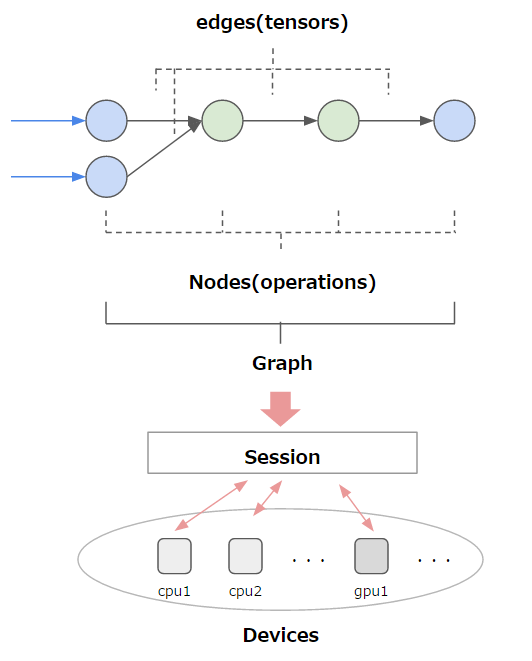

In [2]:
# https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/image_folder_7/Tensorflow_Graph_0.png
Image('./img/Tensorflow_Graph_0.png')

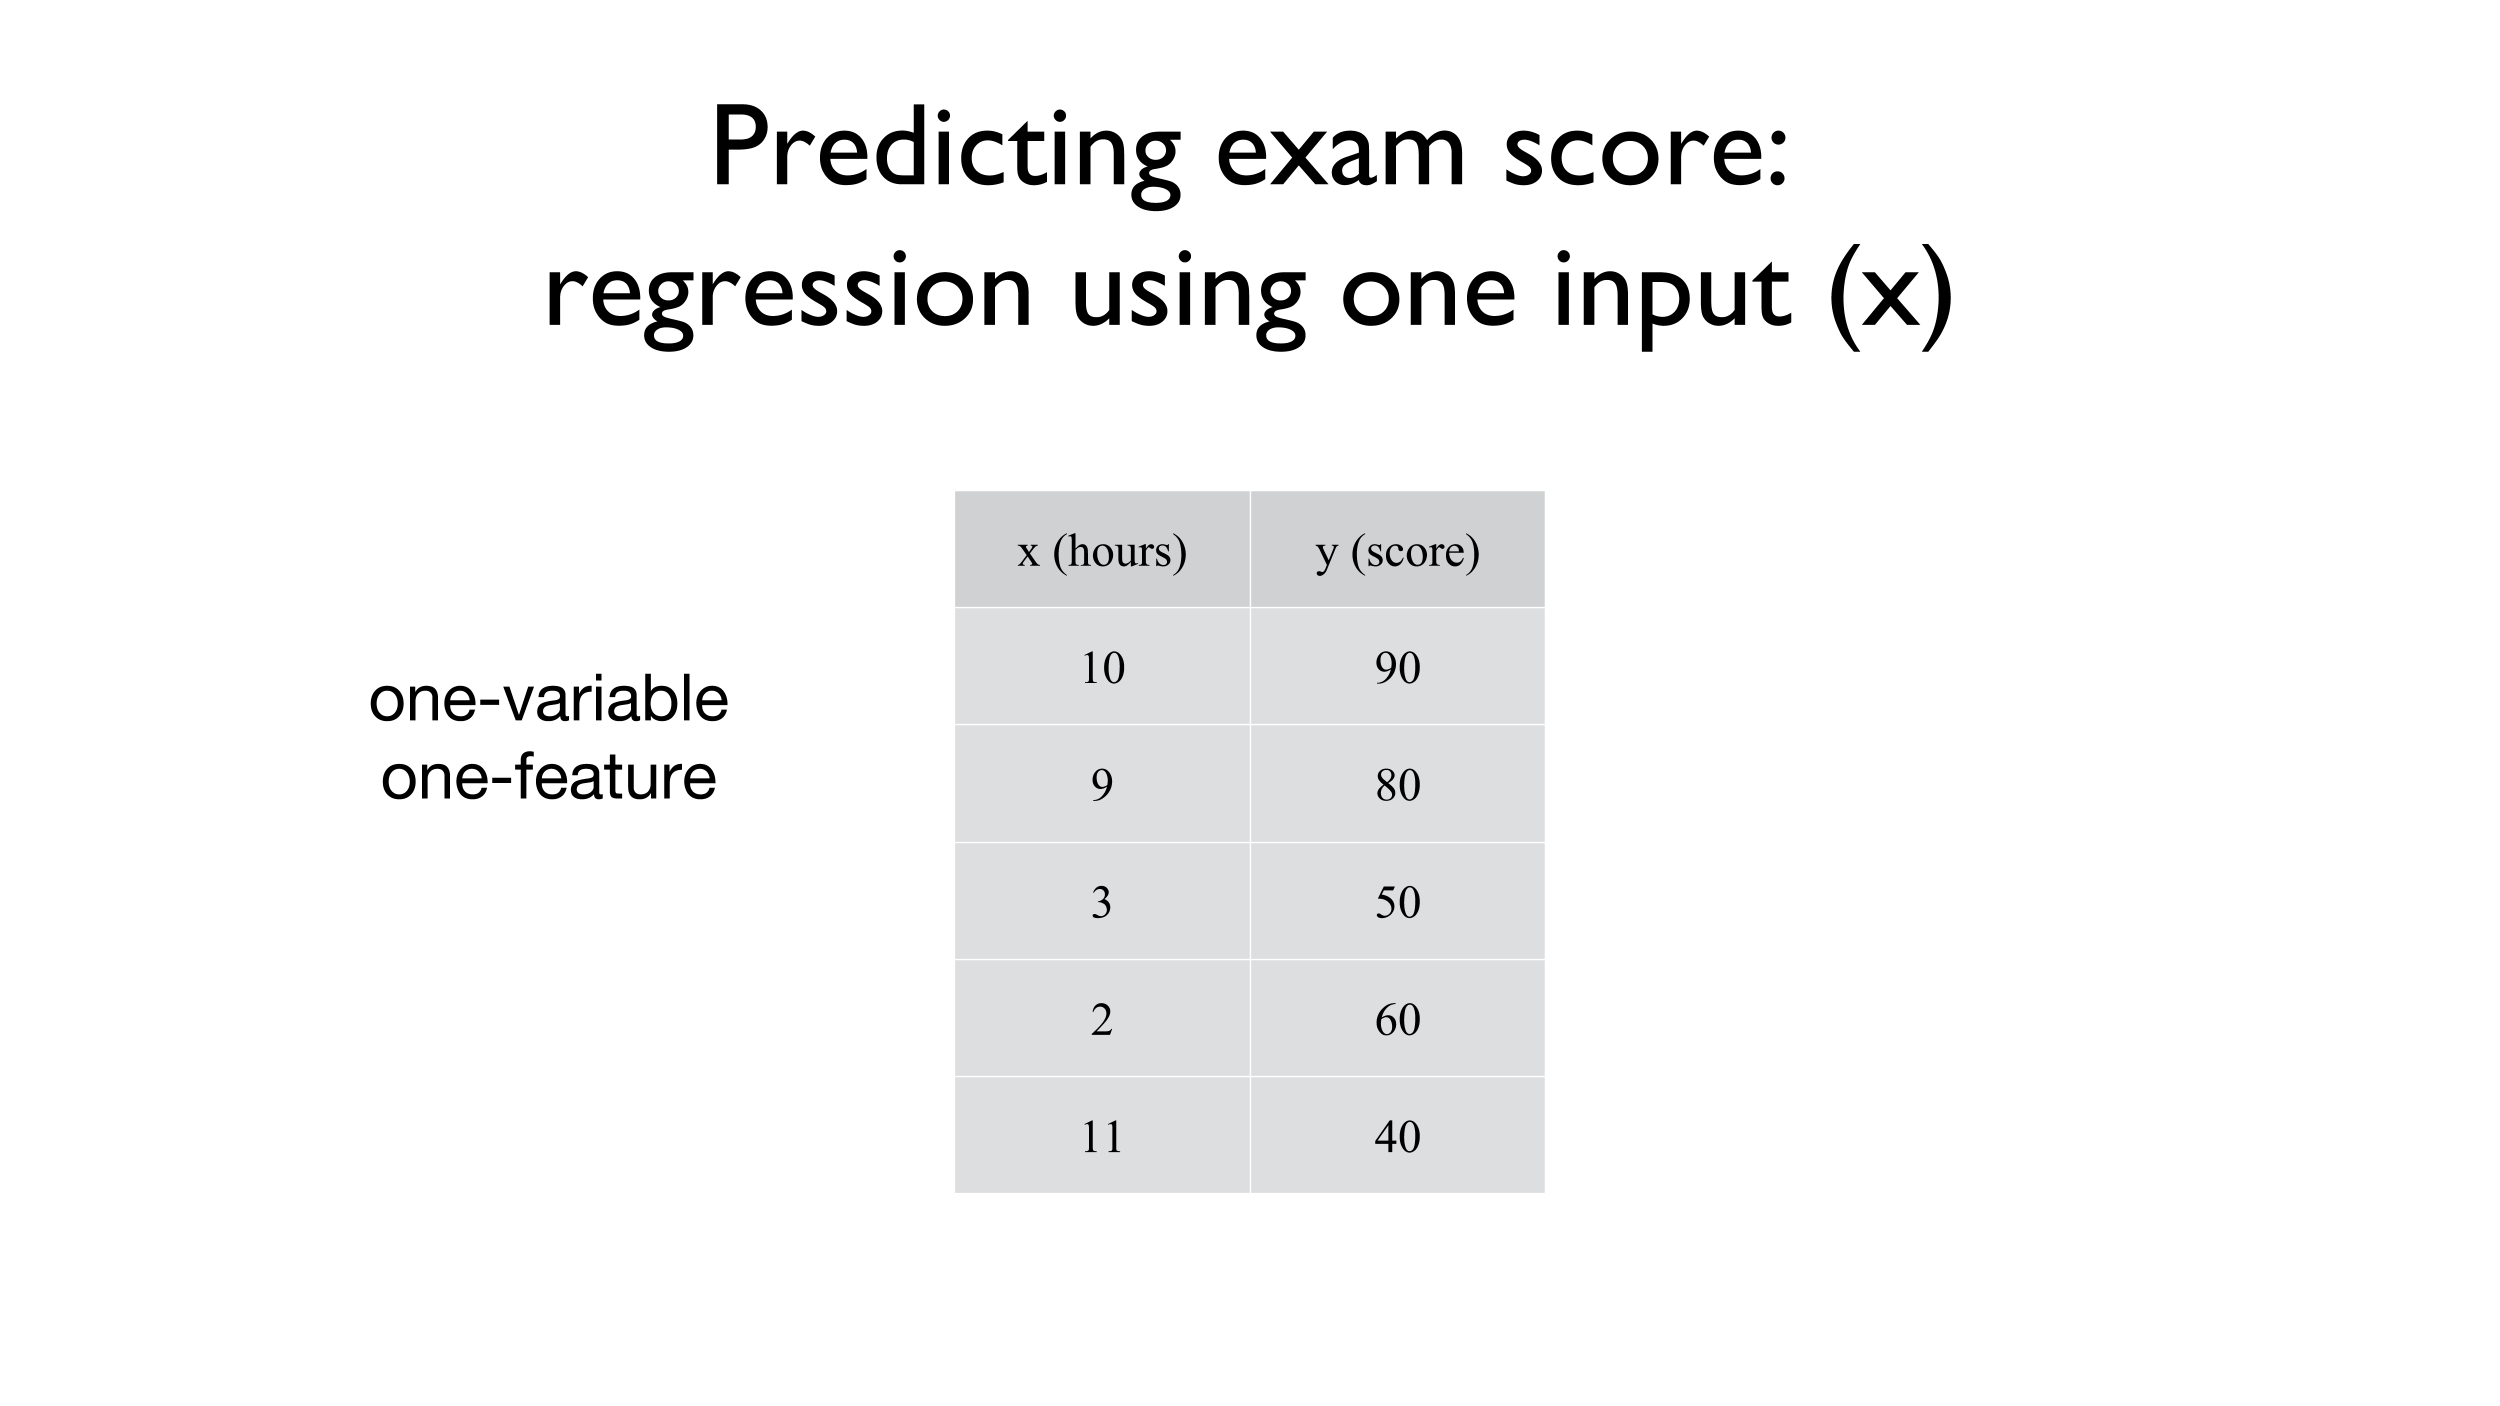

In [3]:
Image('./img/Lec04-01.png', width = 900)

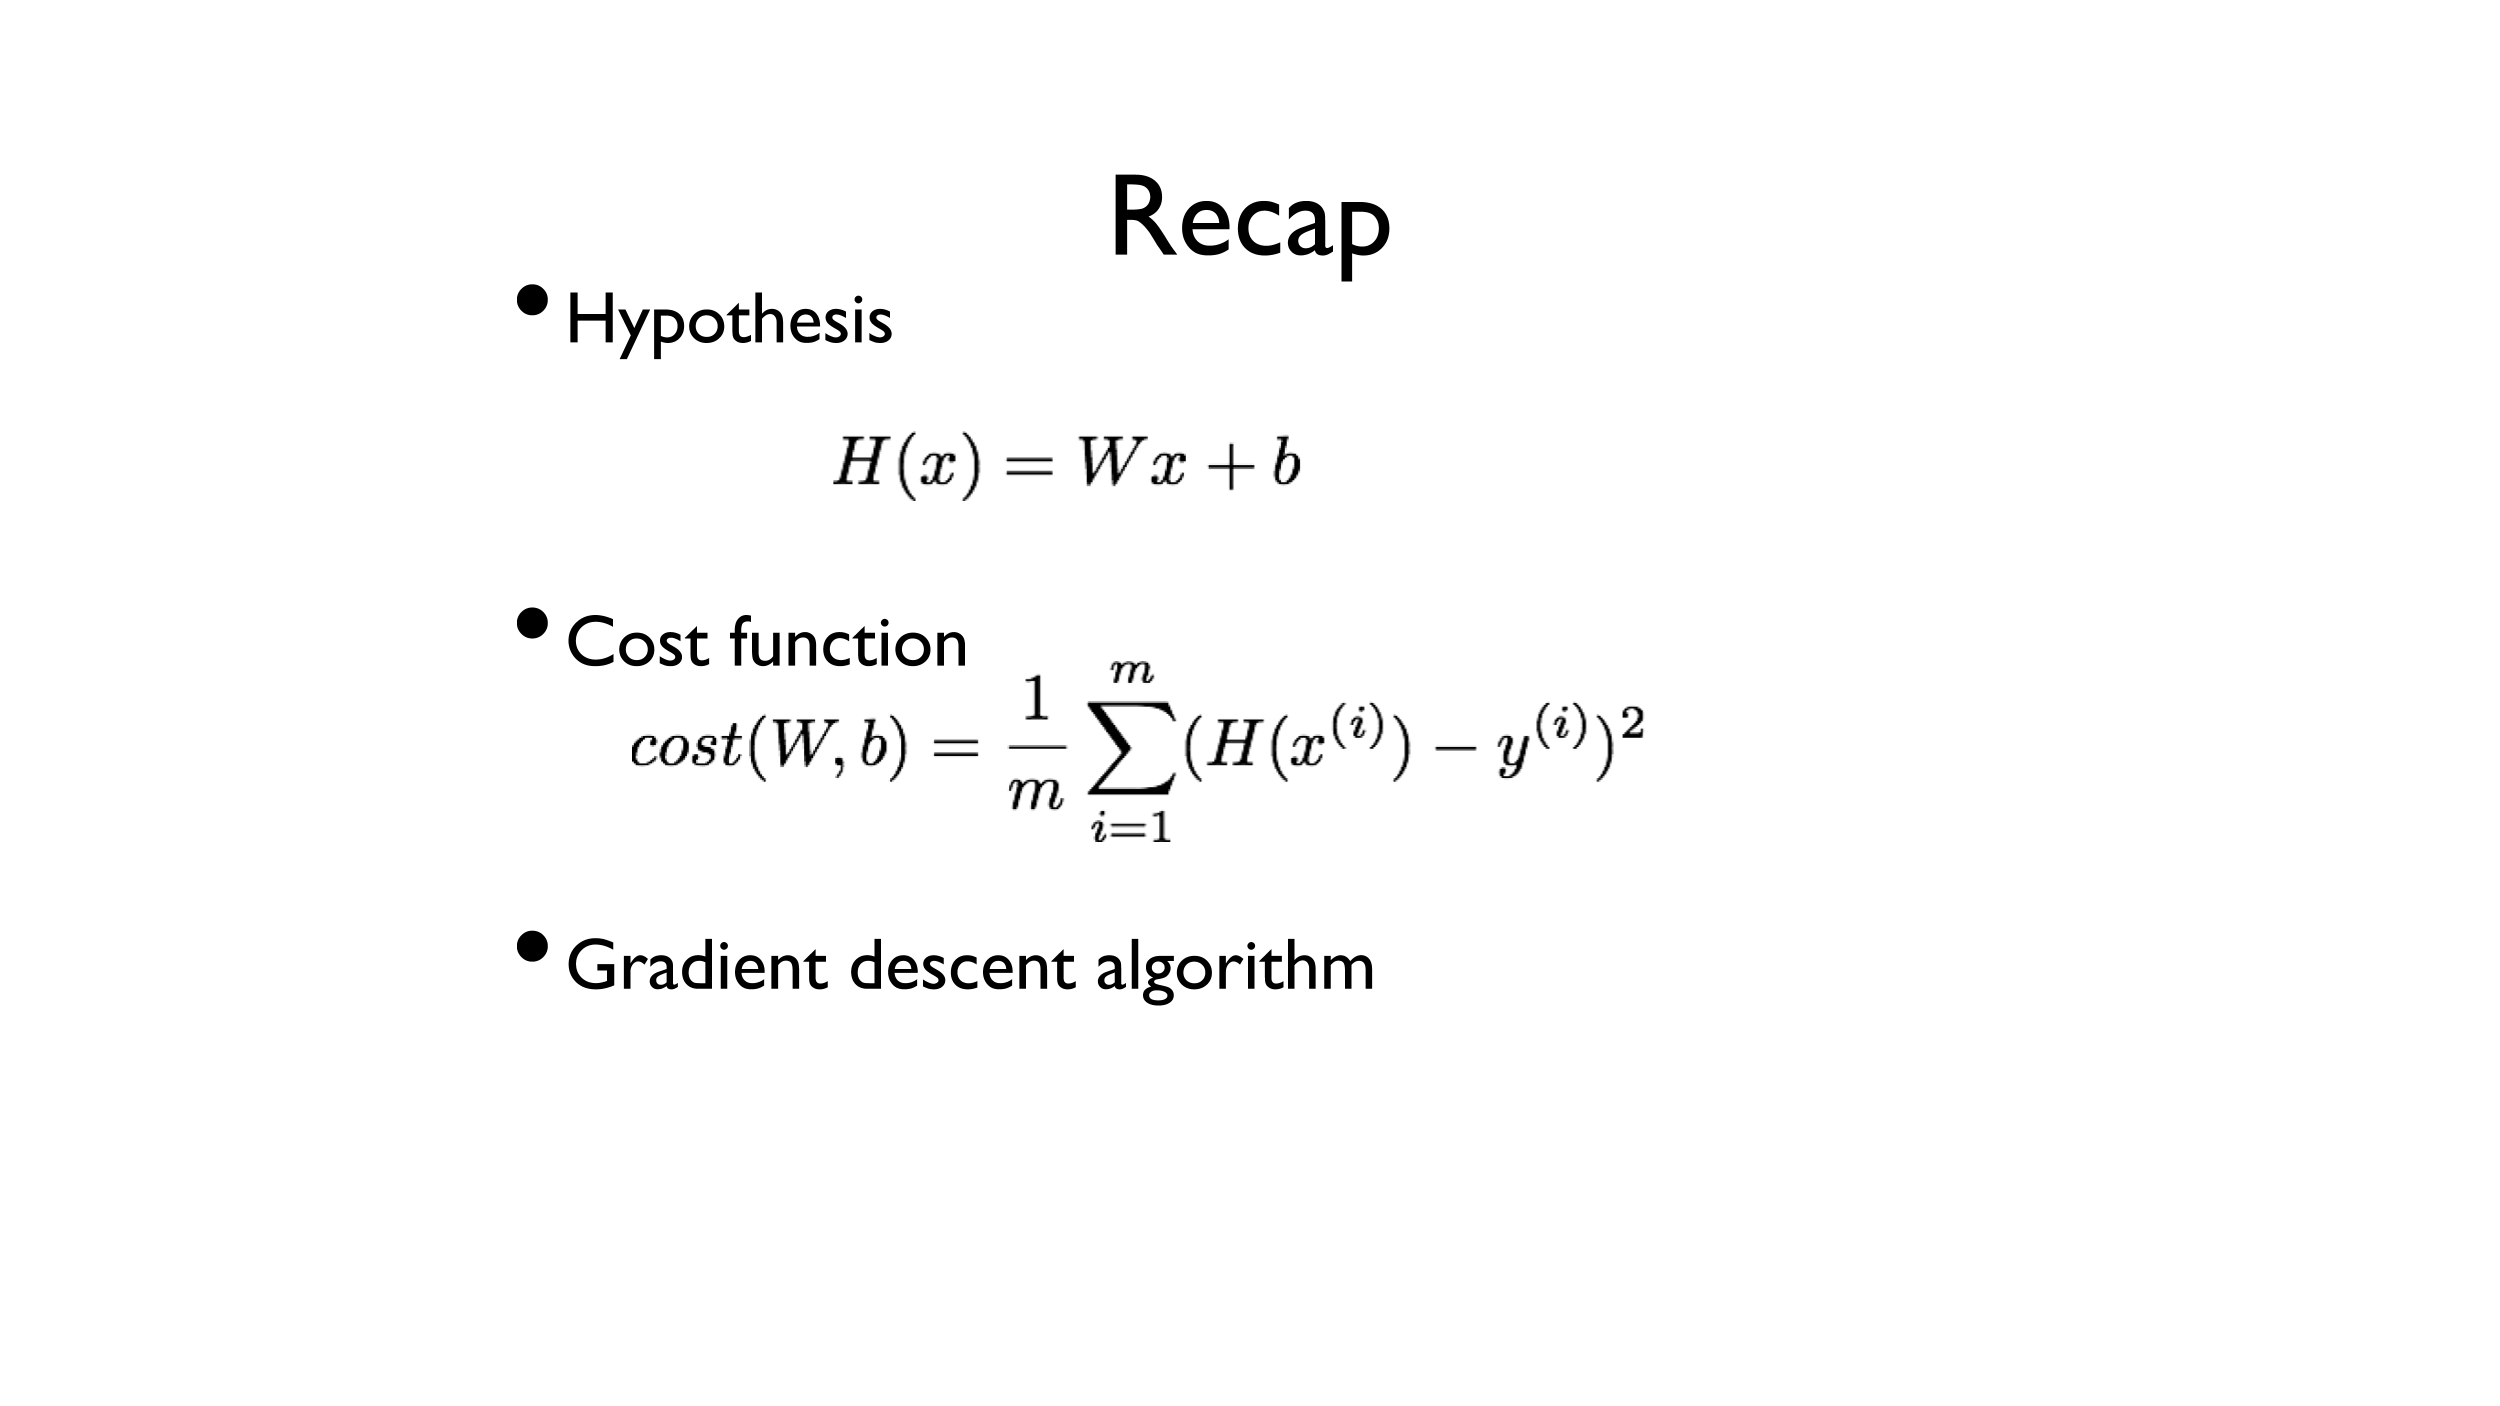

In [4]:
Image('./img/Lec04-011.png', width = 900)

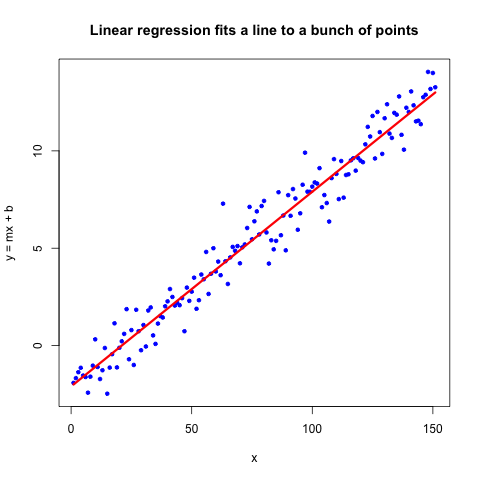

In [5]:
Image('./img/linerRegress.png')

## Multi- variable Linear regression

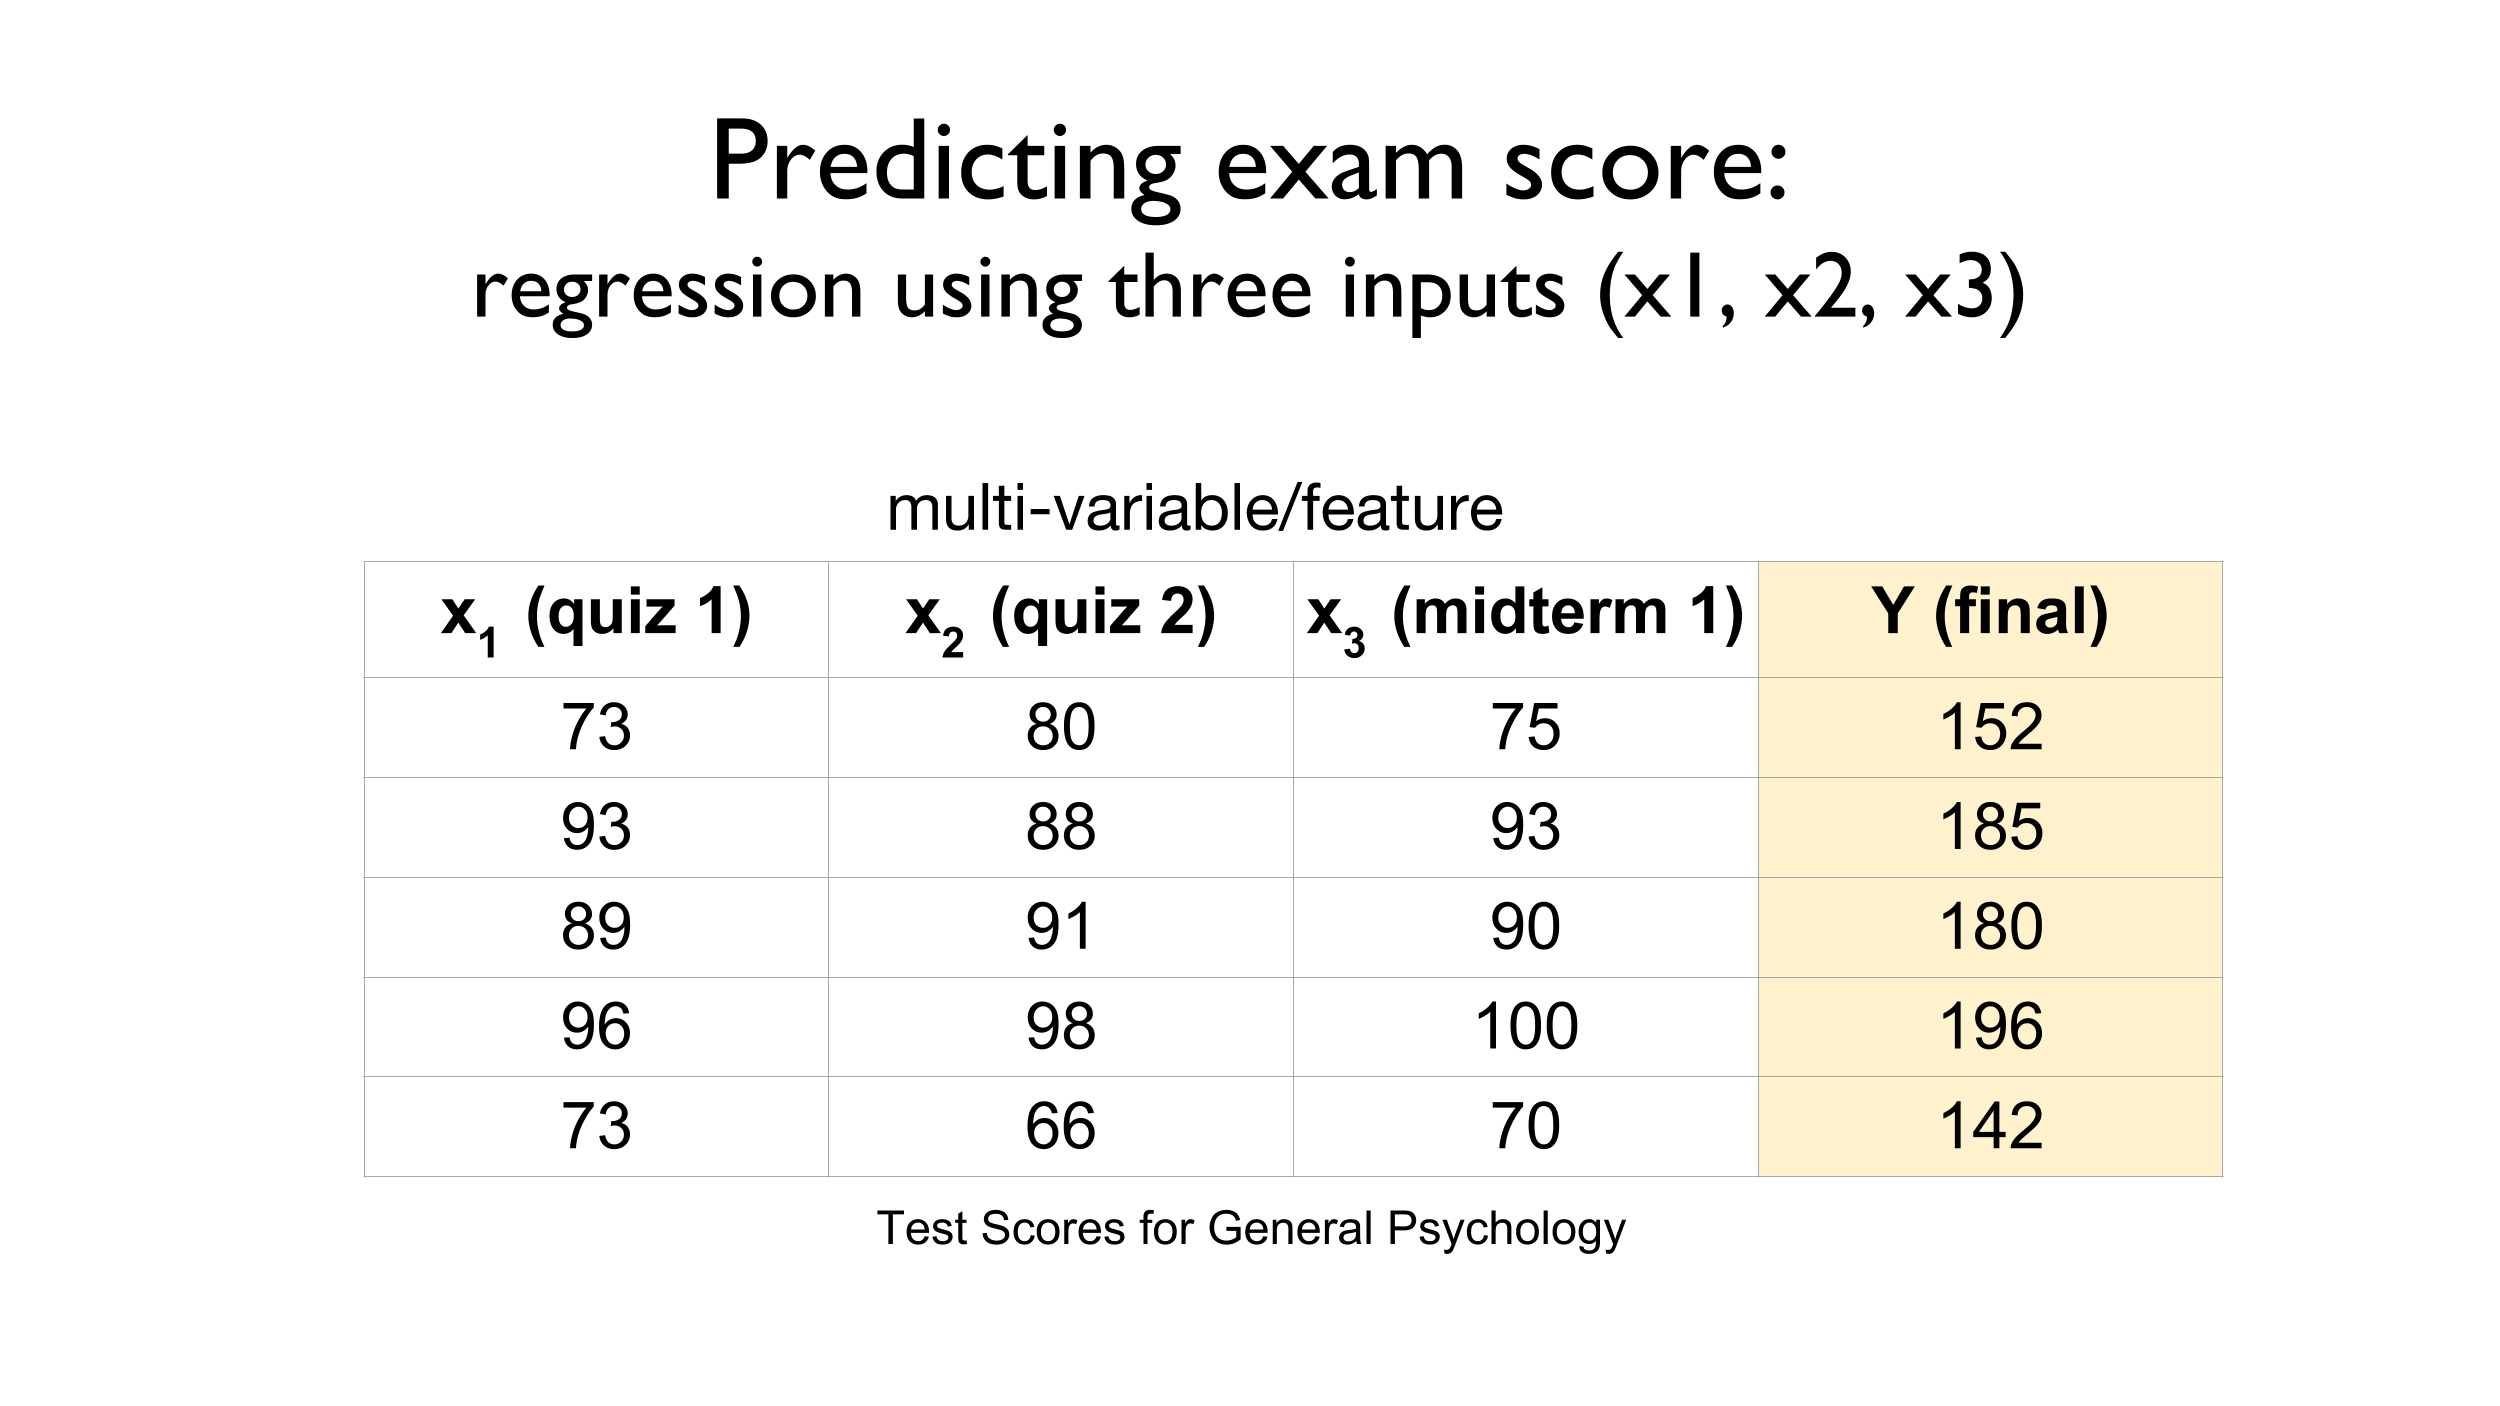

In [6]:
Image('./img/Lec04-02.png', width=900)

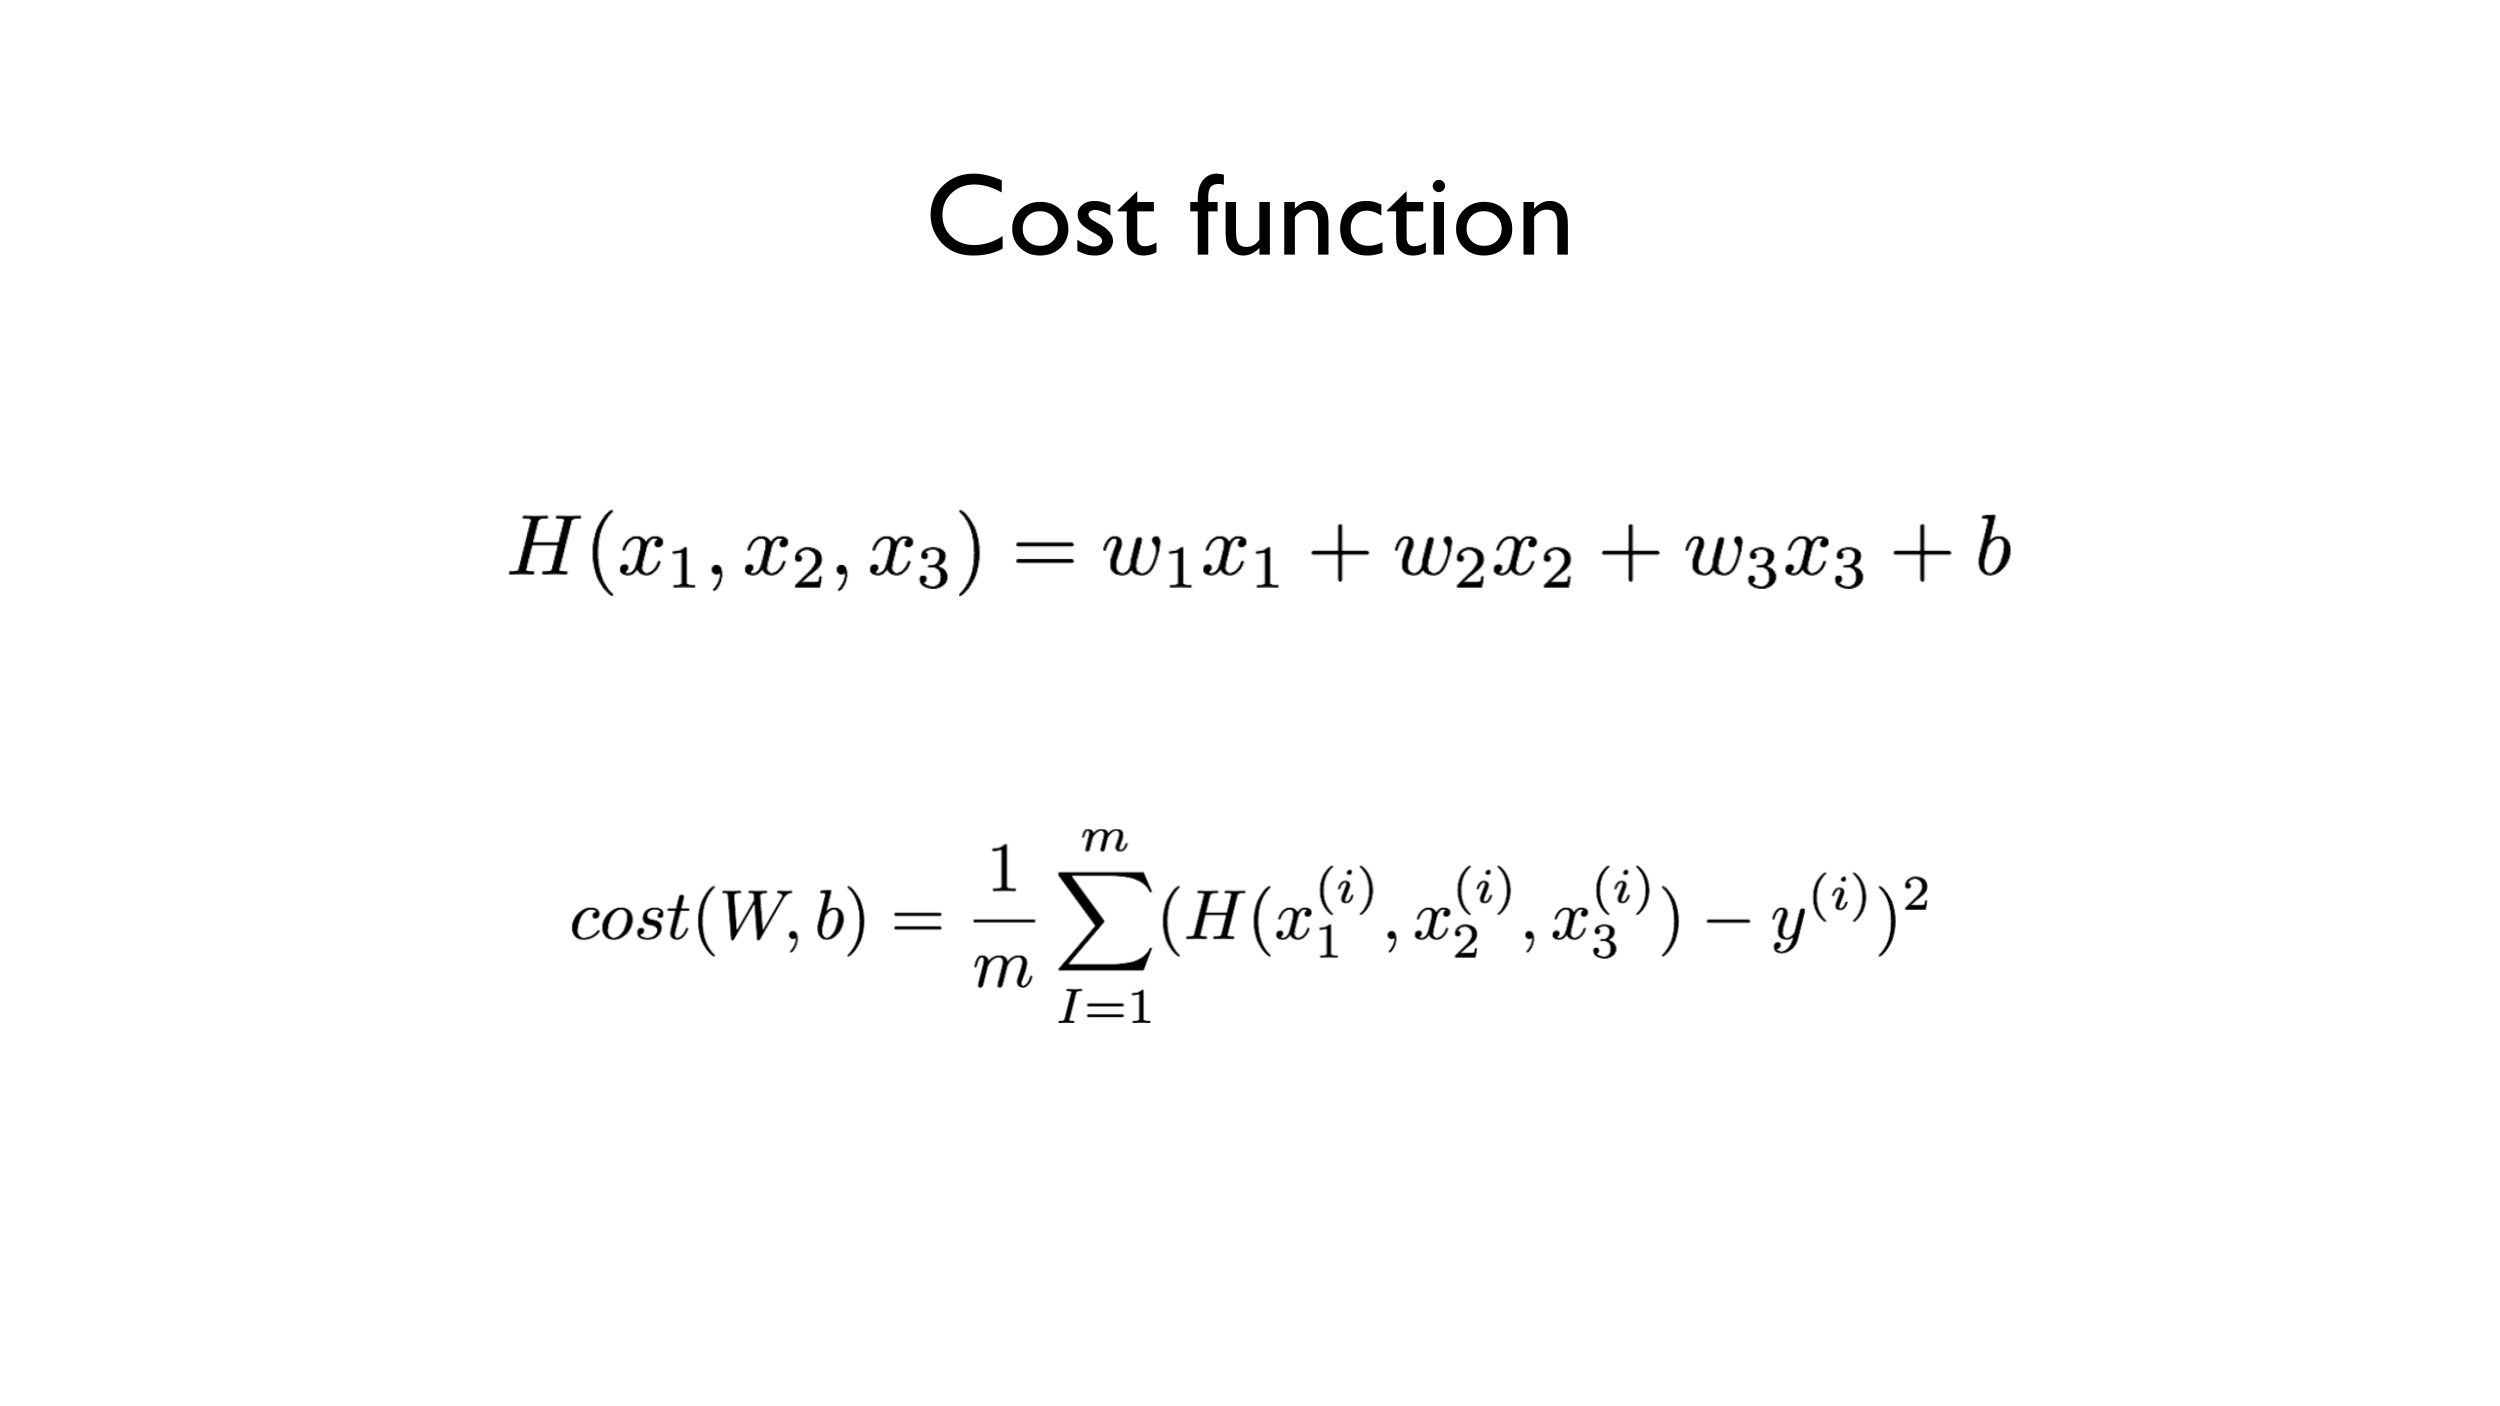

In [7]:
Image('./img/Lec04-021.png', width=900)

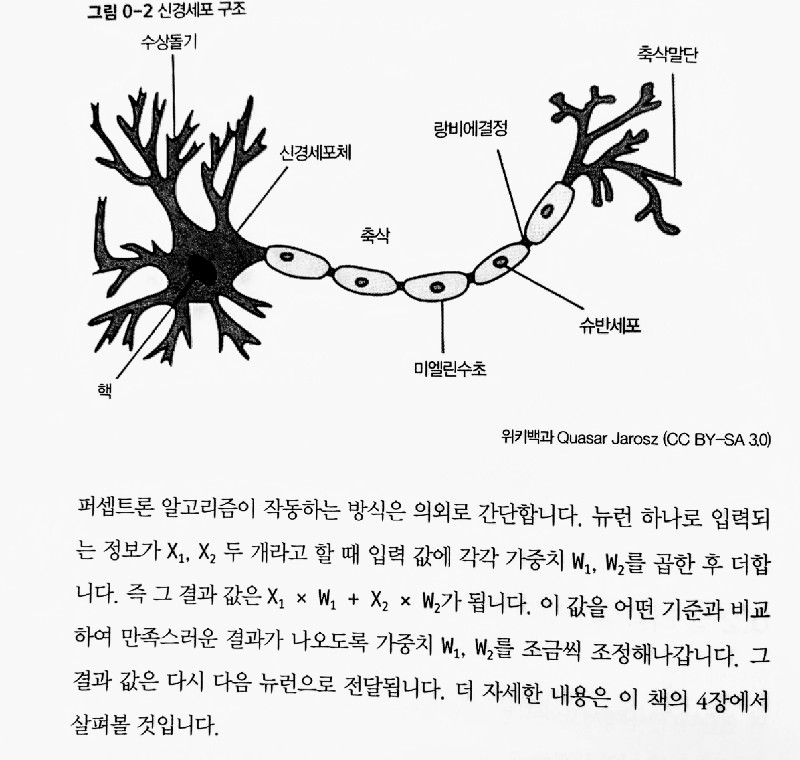

In [8]:
Image('./img/nural-net.jpg', width=600)

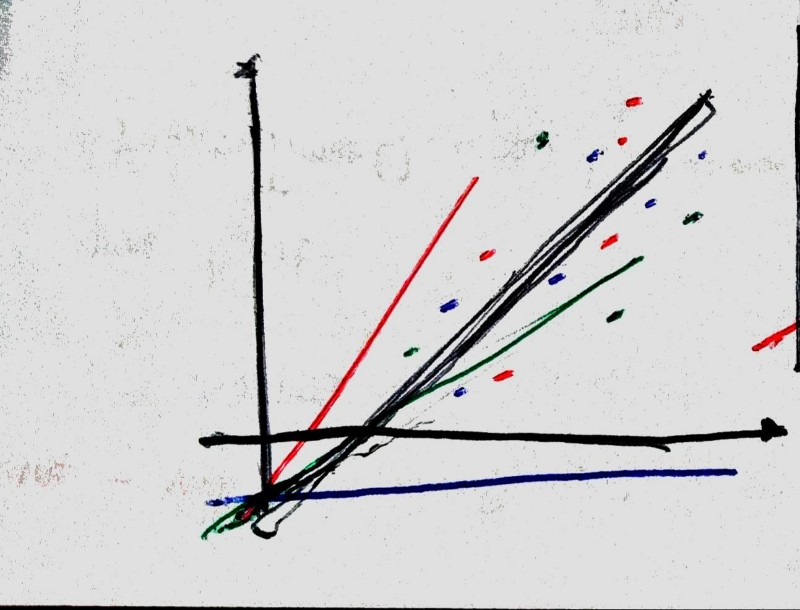

In [9]:
Image('./img/Lec04-hand.jpg')

## 01. Linear Regression  3개로 병렬 계산

### 01) 실험의 준비

In [10]:
import tensorflow as tf

In [11]:
# placeholder 로 입력공간을 정의
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [12]:
# 연산에 활용할 변수를 정의
tf.set_random_seed(777)  # for reproducibility
w1 = tf.Variable(tf.random_normal([1]), name ='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

##  H(x) = w1X  + w2X + w3X + b


In [13]:
# 가설을 정의
hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b

In [14]:
# 검증할 비용함수  ( (가설 - Y) 의 제곱을 평균한 결과 )
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [15]:
# Gradient (기울기) 의 최적값 계산 (소숫점 5자리 까지 연산)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [16]:
# Launch the Graph in a Session
sess = tf.Session()

In [17]:
# 검증용 그래프를 실행
sess.run(tf.global_variables_initializer())

### 02) H(x) 의 w1, w2, w3, b 변화를 관찰

In [18]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [72., 85., 90., 96., 72.]

In [19]:
for step in range(2001):
    cost_val, w1_val, w2_val, w3_val, b_val,  _ = sess.run([cost, w1, w2 ,w3, b, train],
                          feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})
    if step % 500 == 0 :
        print(step, "Cost: ", cost_val, "\n", "w1 :", w1_val, "w2 :", w2_val, "w3 :", w3_val, "b", b_val)

0 Cost:  26060.0 
 w1 : [ 0.86334789] w2 : [-1.00476217] w3 : [ 0.06552626] b [-0.50649238]
500 Cost:  21.4947 
 w1 : [ 1.12948132] w2 : [-0.54015356] w3 : [ 0.38992065] b [-0.50203675]
1000 Cost:  18.262 
 w1 : [ 1.05654442] w2 : [-0.4397516] w3 : [ 0.36286497] b [-0.50158542]
1500 Cost:  15.7929 
 w1 : [ 0.9934209] w2 : [-0.35178709] w3 : [ 0.33839029] b [-0.5010727]
2000 Cost:  13.9063 
 w1 : [ 0.93886149] w2 : [-0.27468735] w3 : [ 0.31617856] b [-0.50050932]


### 03) H(x)  가설결과값의 변화를 관찰
- y_data와 근접한 결과를 찾기위해 반복

In [20]:
for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                          feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})
    if step % 500 == 0 :
        print(step, "Cost: ", cost_val, "\n Predication \n", hy_val)

0 Cost:  13.903 
 Predication 
 [ 69.77478027  92.04572296  86.51767731  94.32868958  72.03951263]
500 Cost:  12.4615 
 Predication 
 [ 70.22977448  91.73577118  86.65958405  94.41197205  71.64910126]
1000 Cost:  11.3588 
 Predication 
 [ 70.62812805  91.4646225   86.78410339  94.48291779  71.30943298]
1500 Cost:  10.5144 
 Predication 
 [ 70.97702026  91.22734833  86.89342499  94.54309082  71.01403809]
2000 Cost:  9.86717 
 Predication 
 [ 71.28268433  91.01969147  86.98948669  94.59389496  70.75730896]


## 02. Matrix 를 통해서 내용을 간단하게 정리

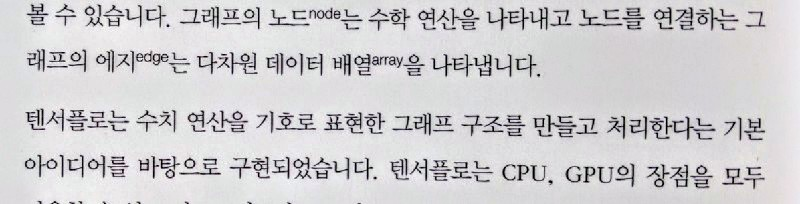

In [21]:
Image('./img/nural-net2.jpg')

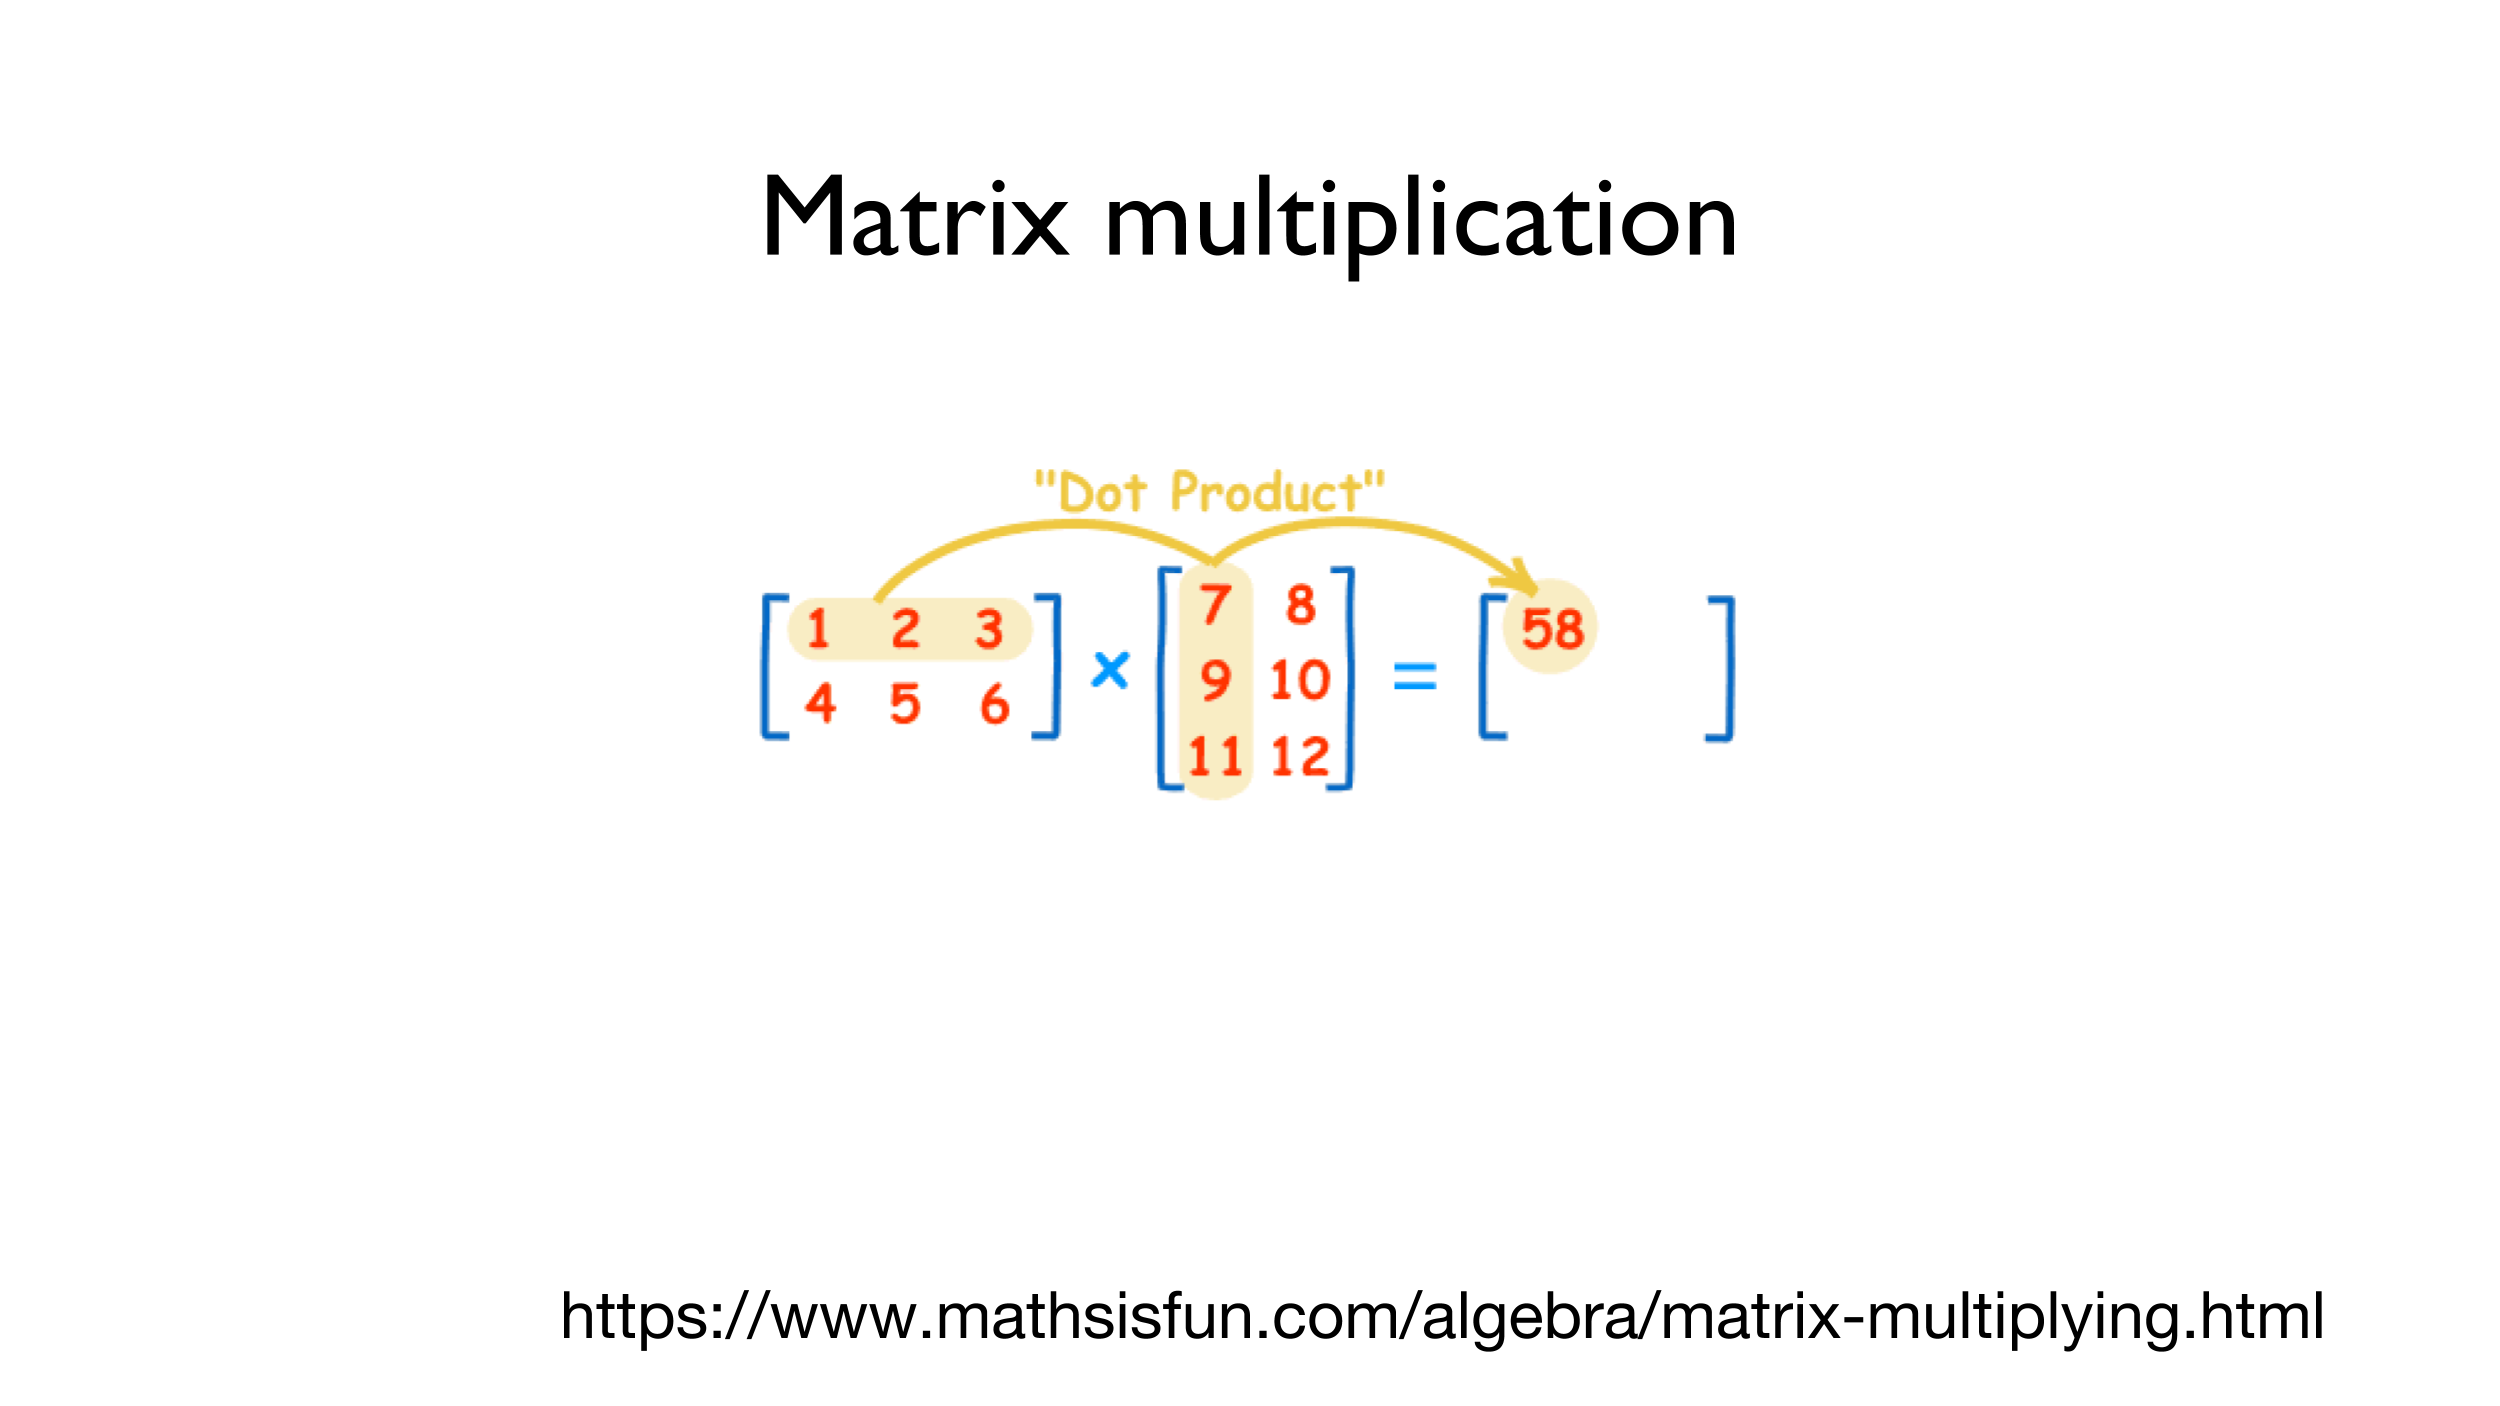

In [22]:
Image('./img/Lec04-022.png', width=900)

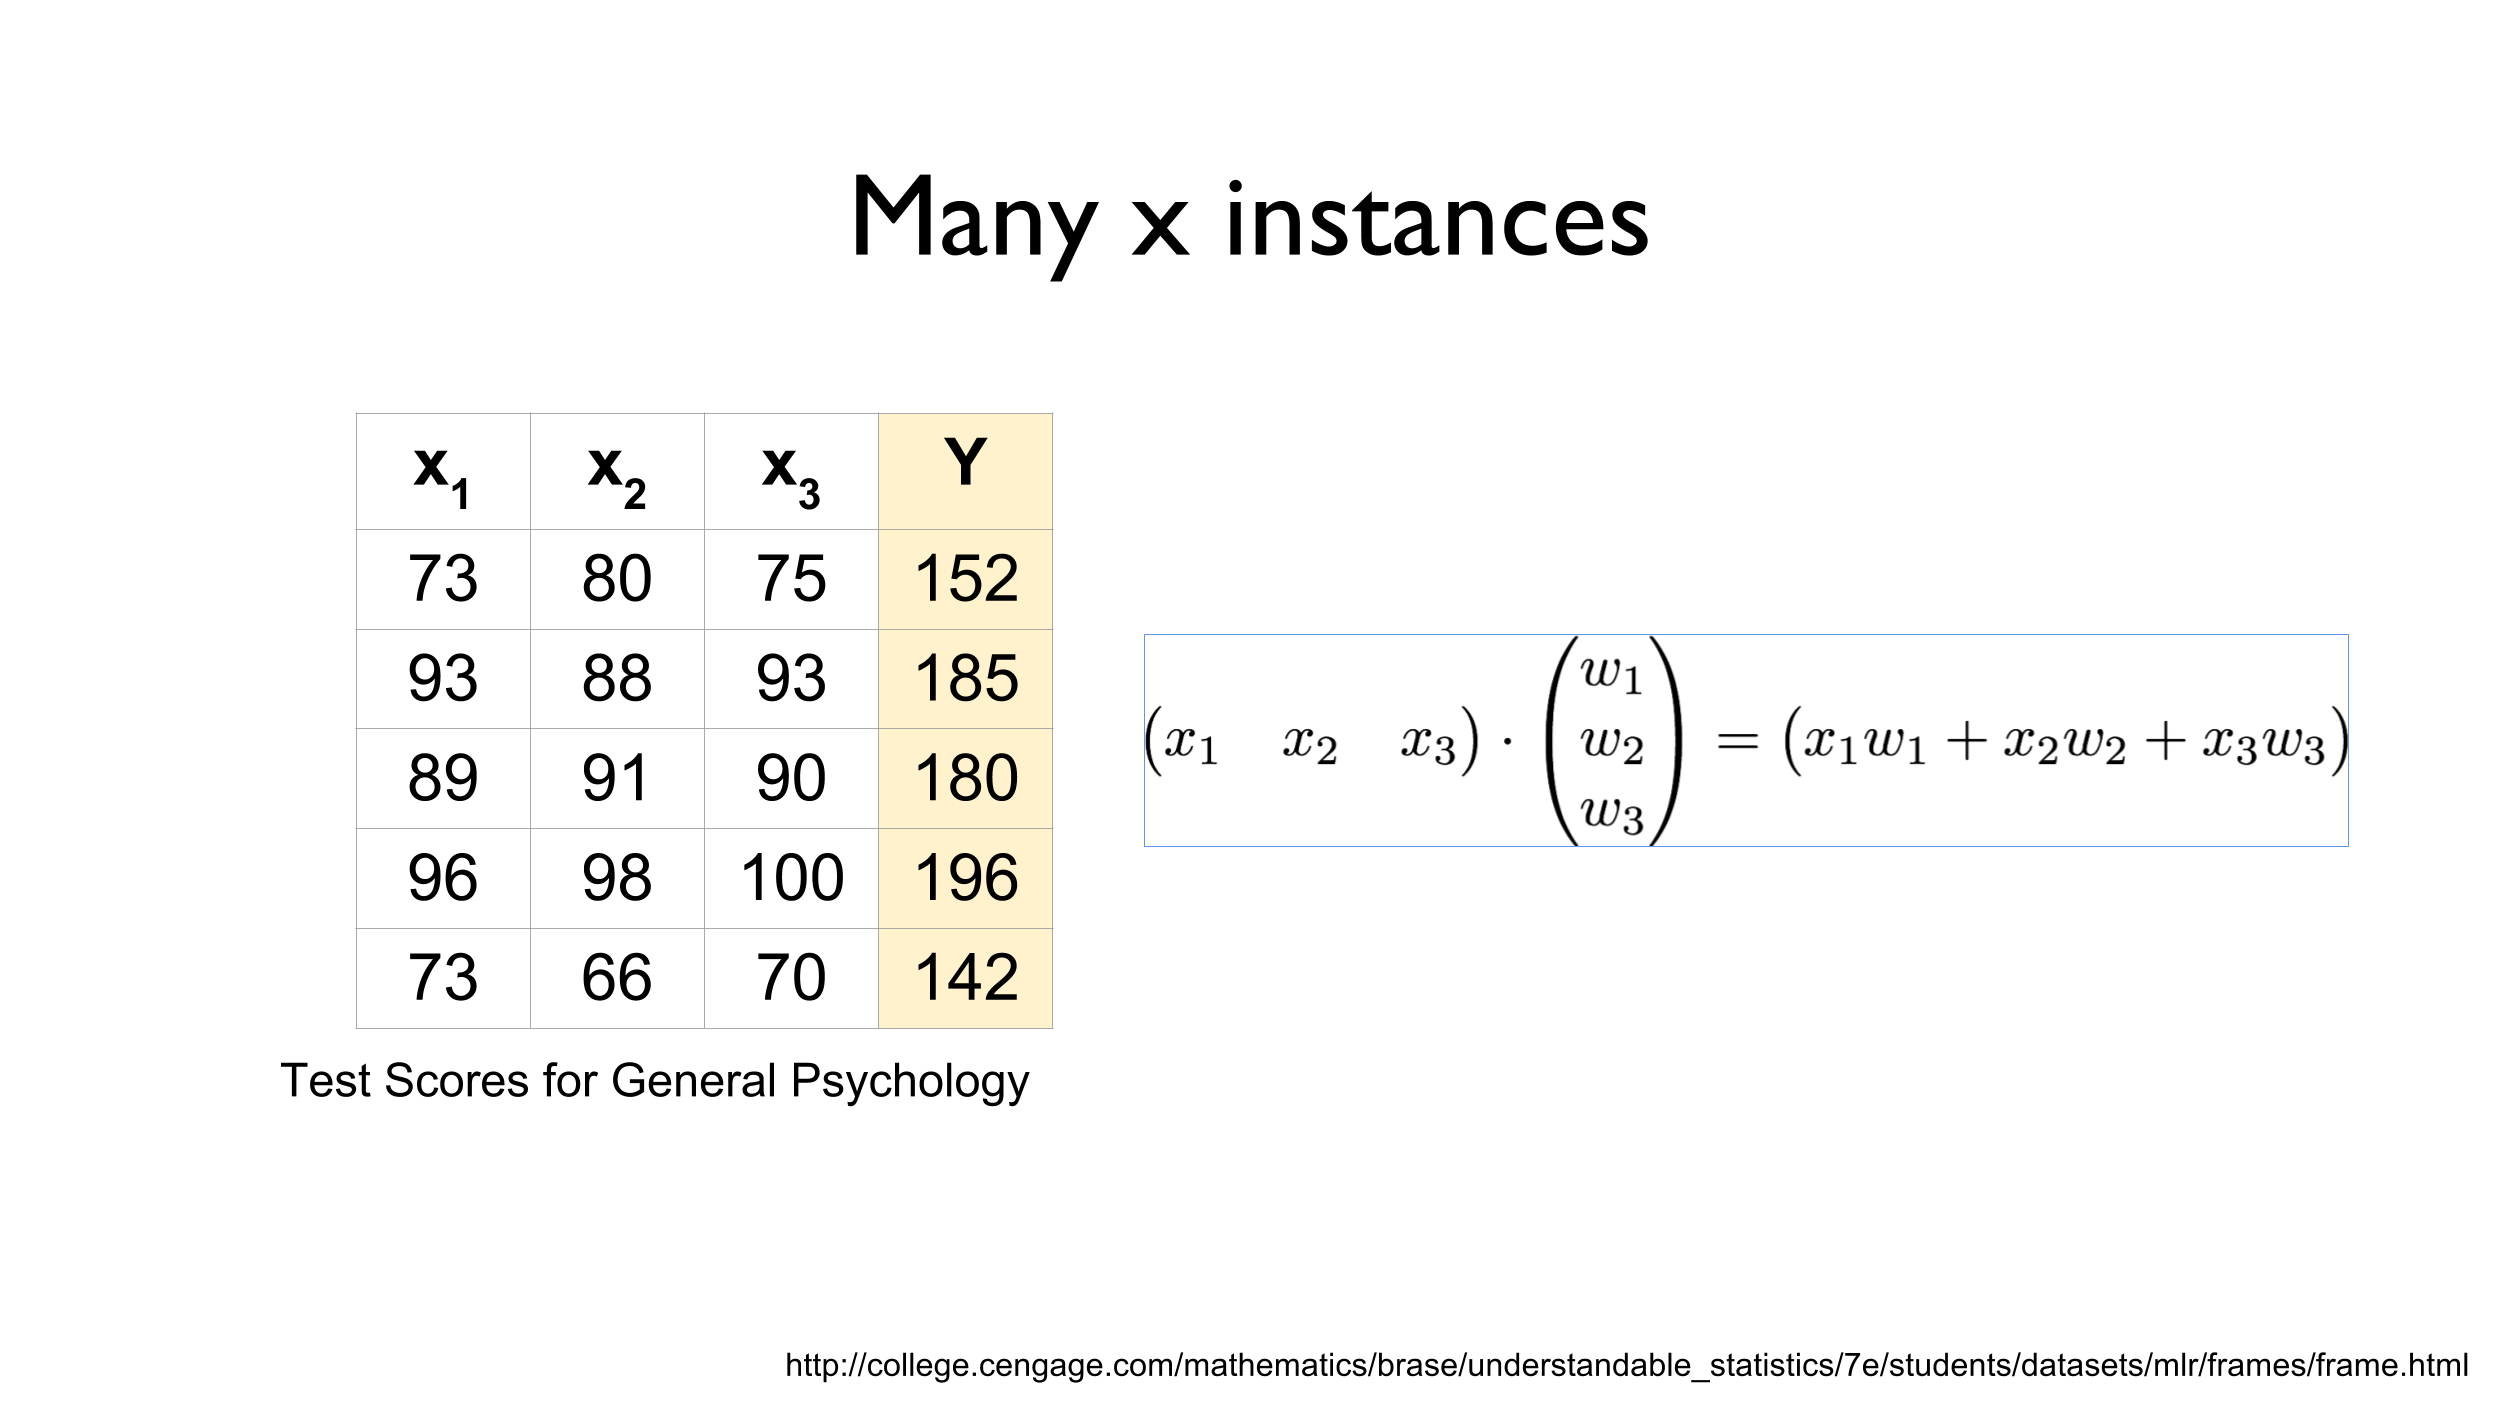

In [23]:
Image('./img/Lec04-024.png', width=900)

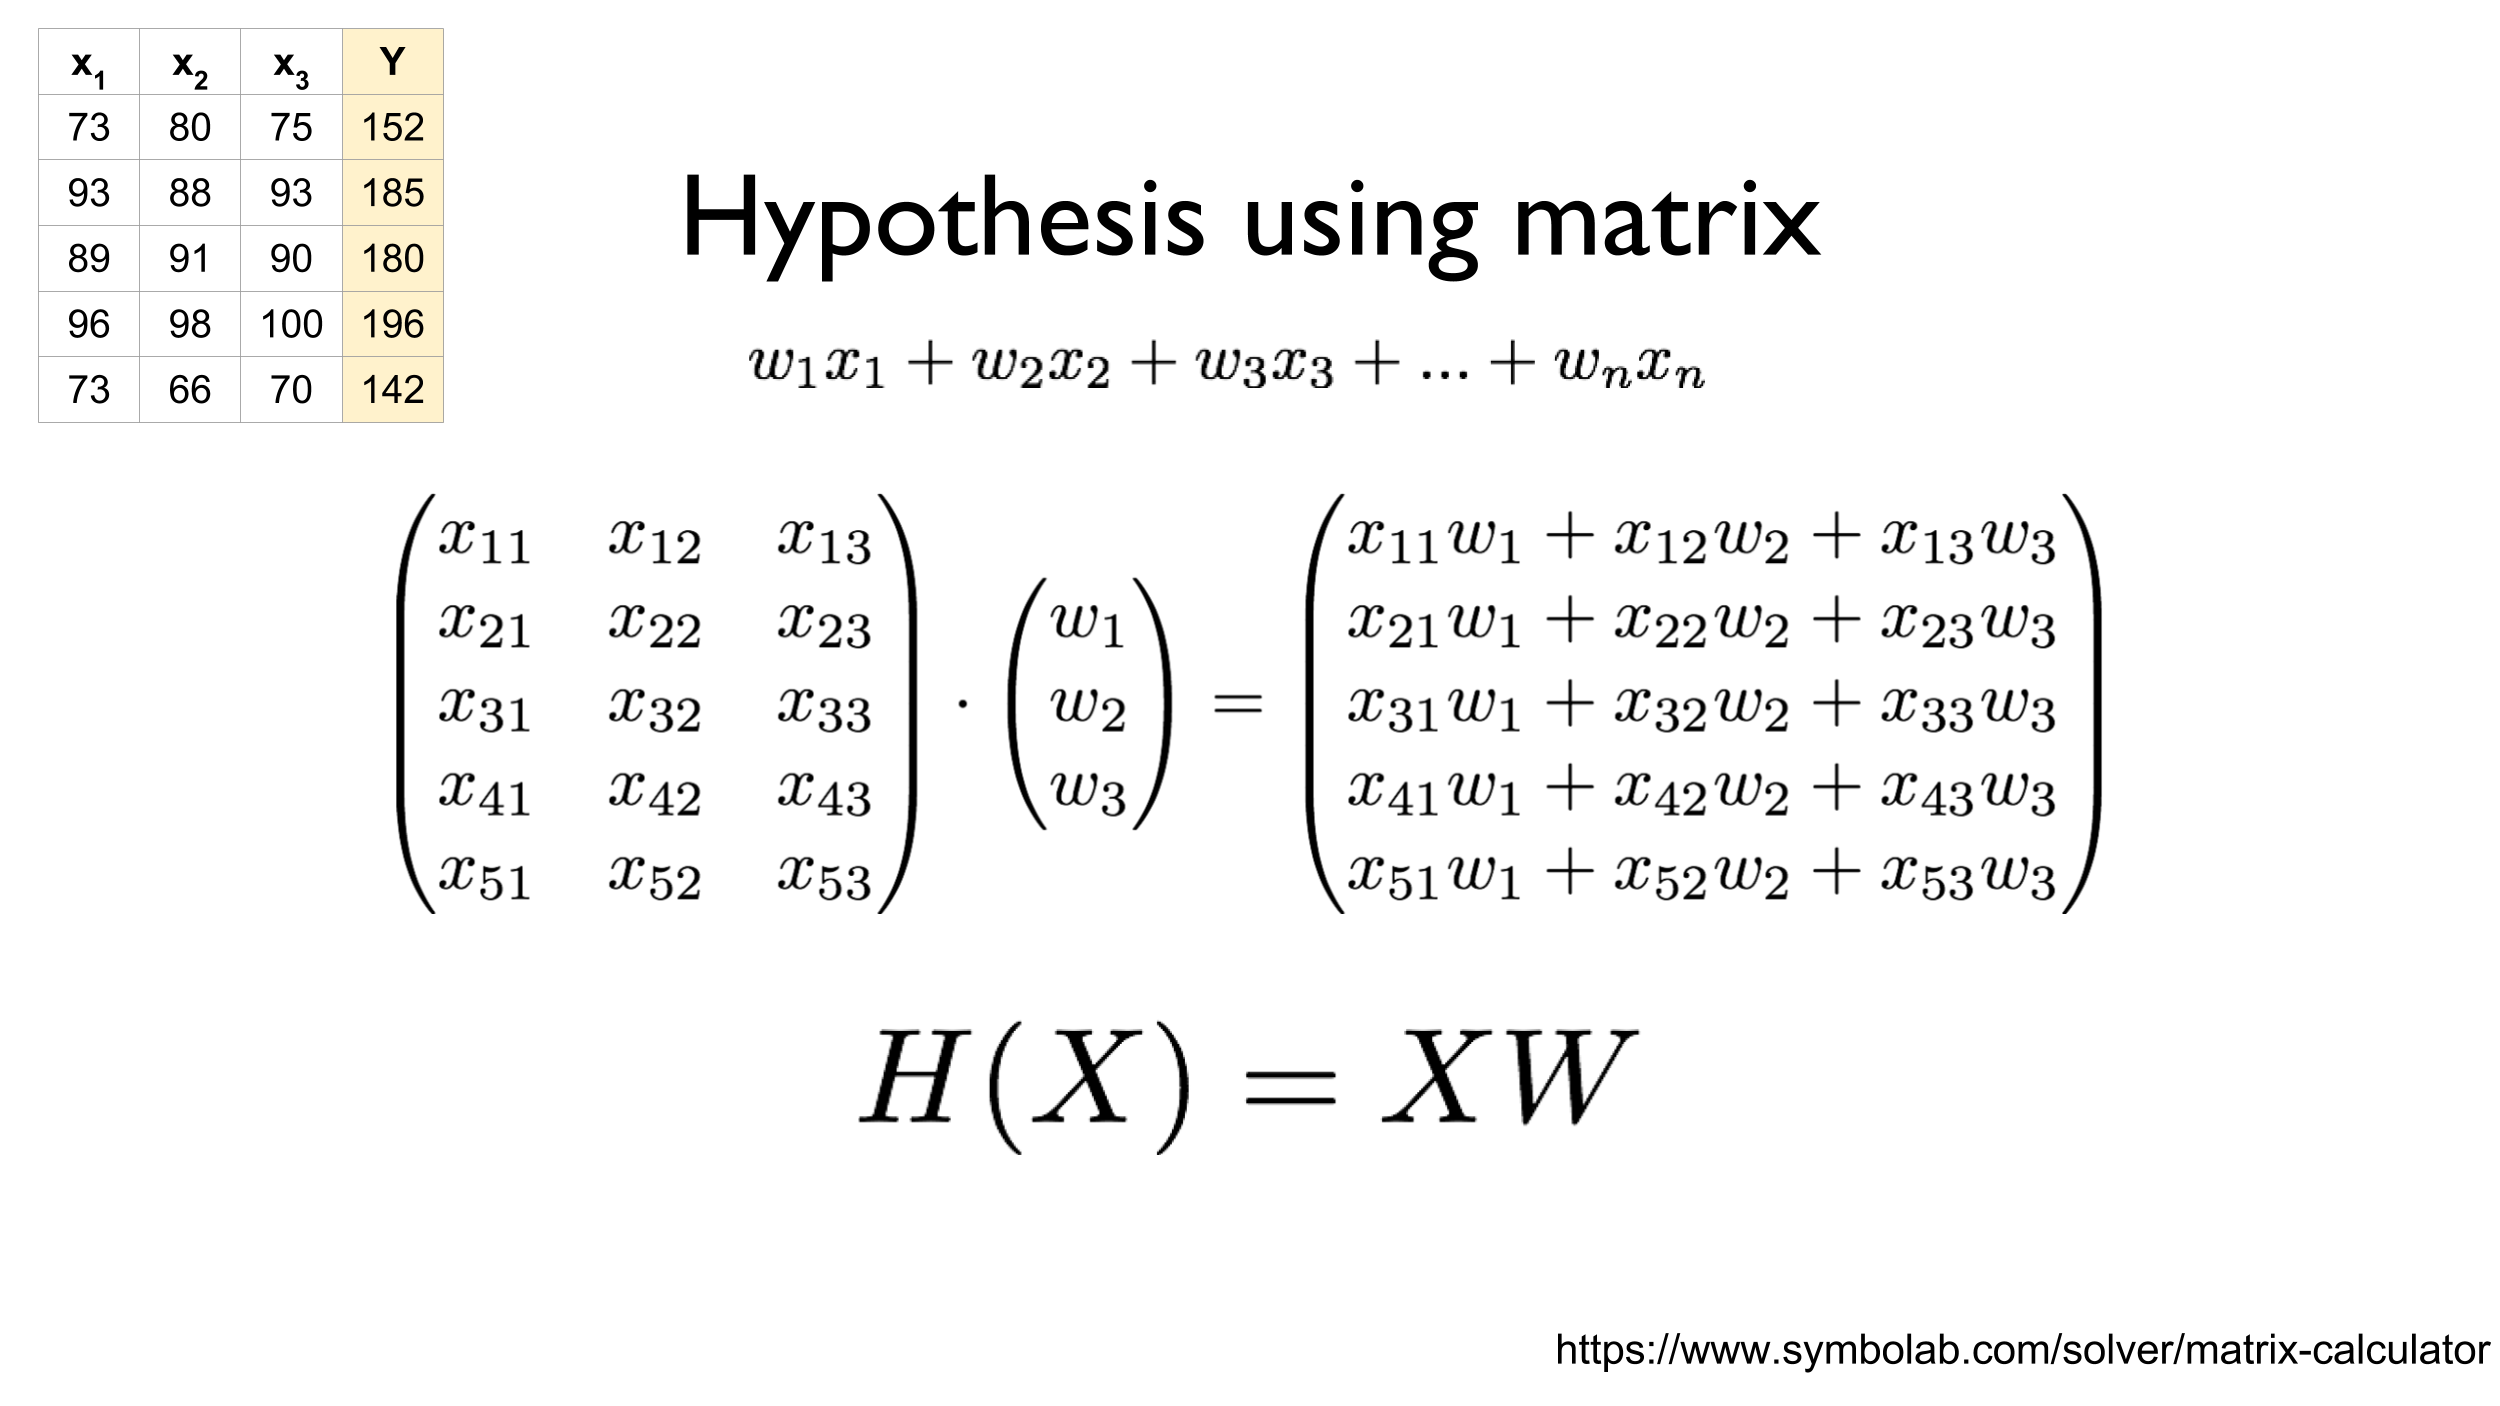

In [24]:
Image('./img/Lec04-031.png', width=900)

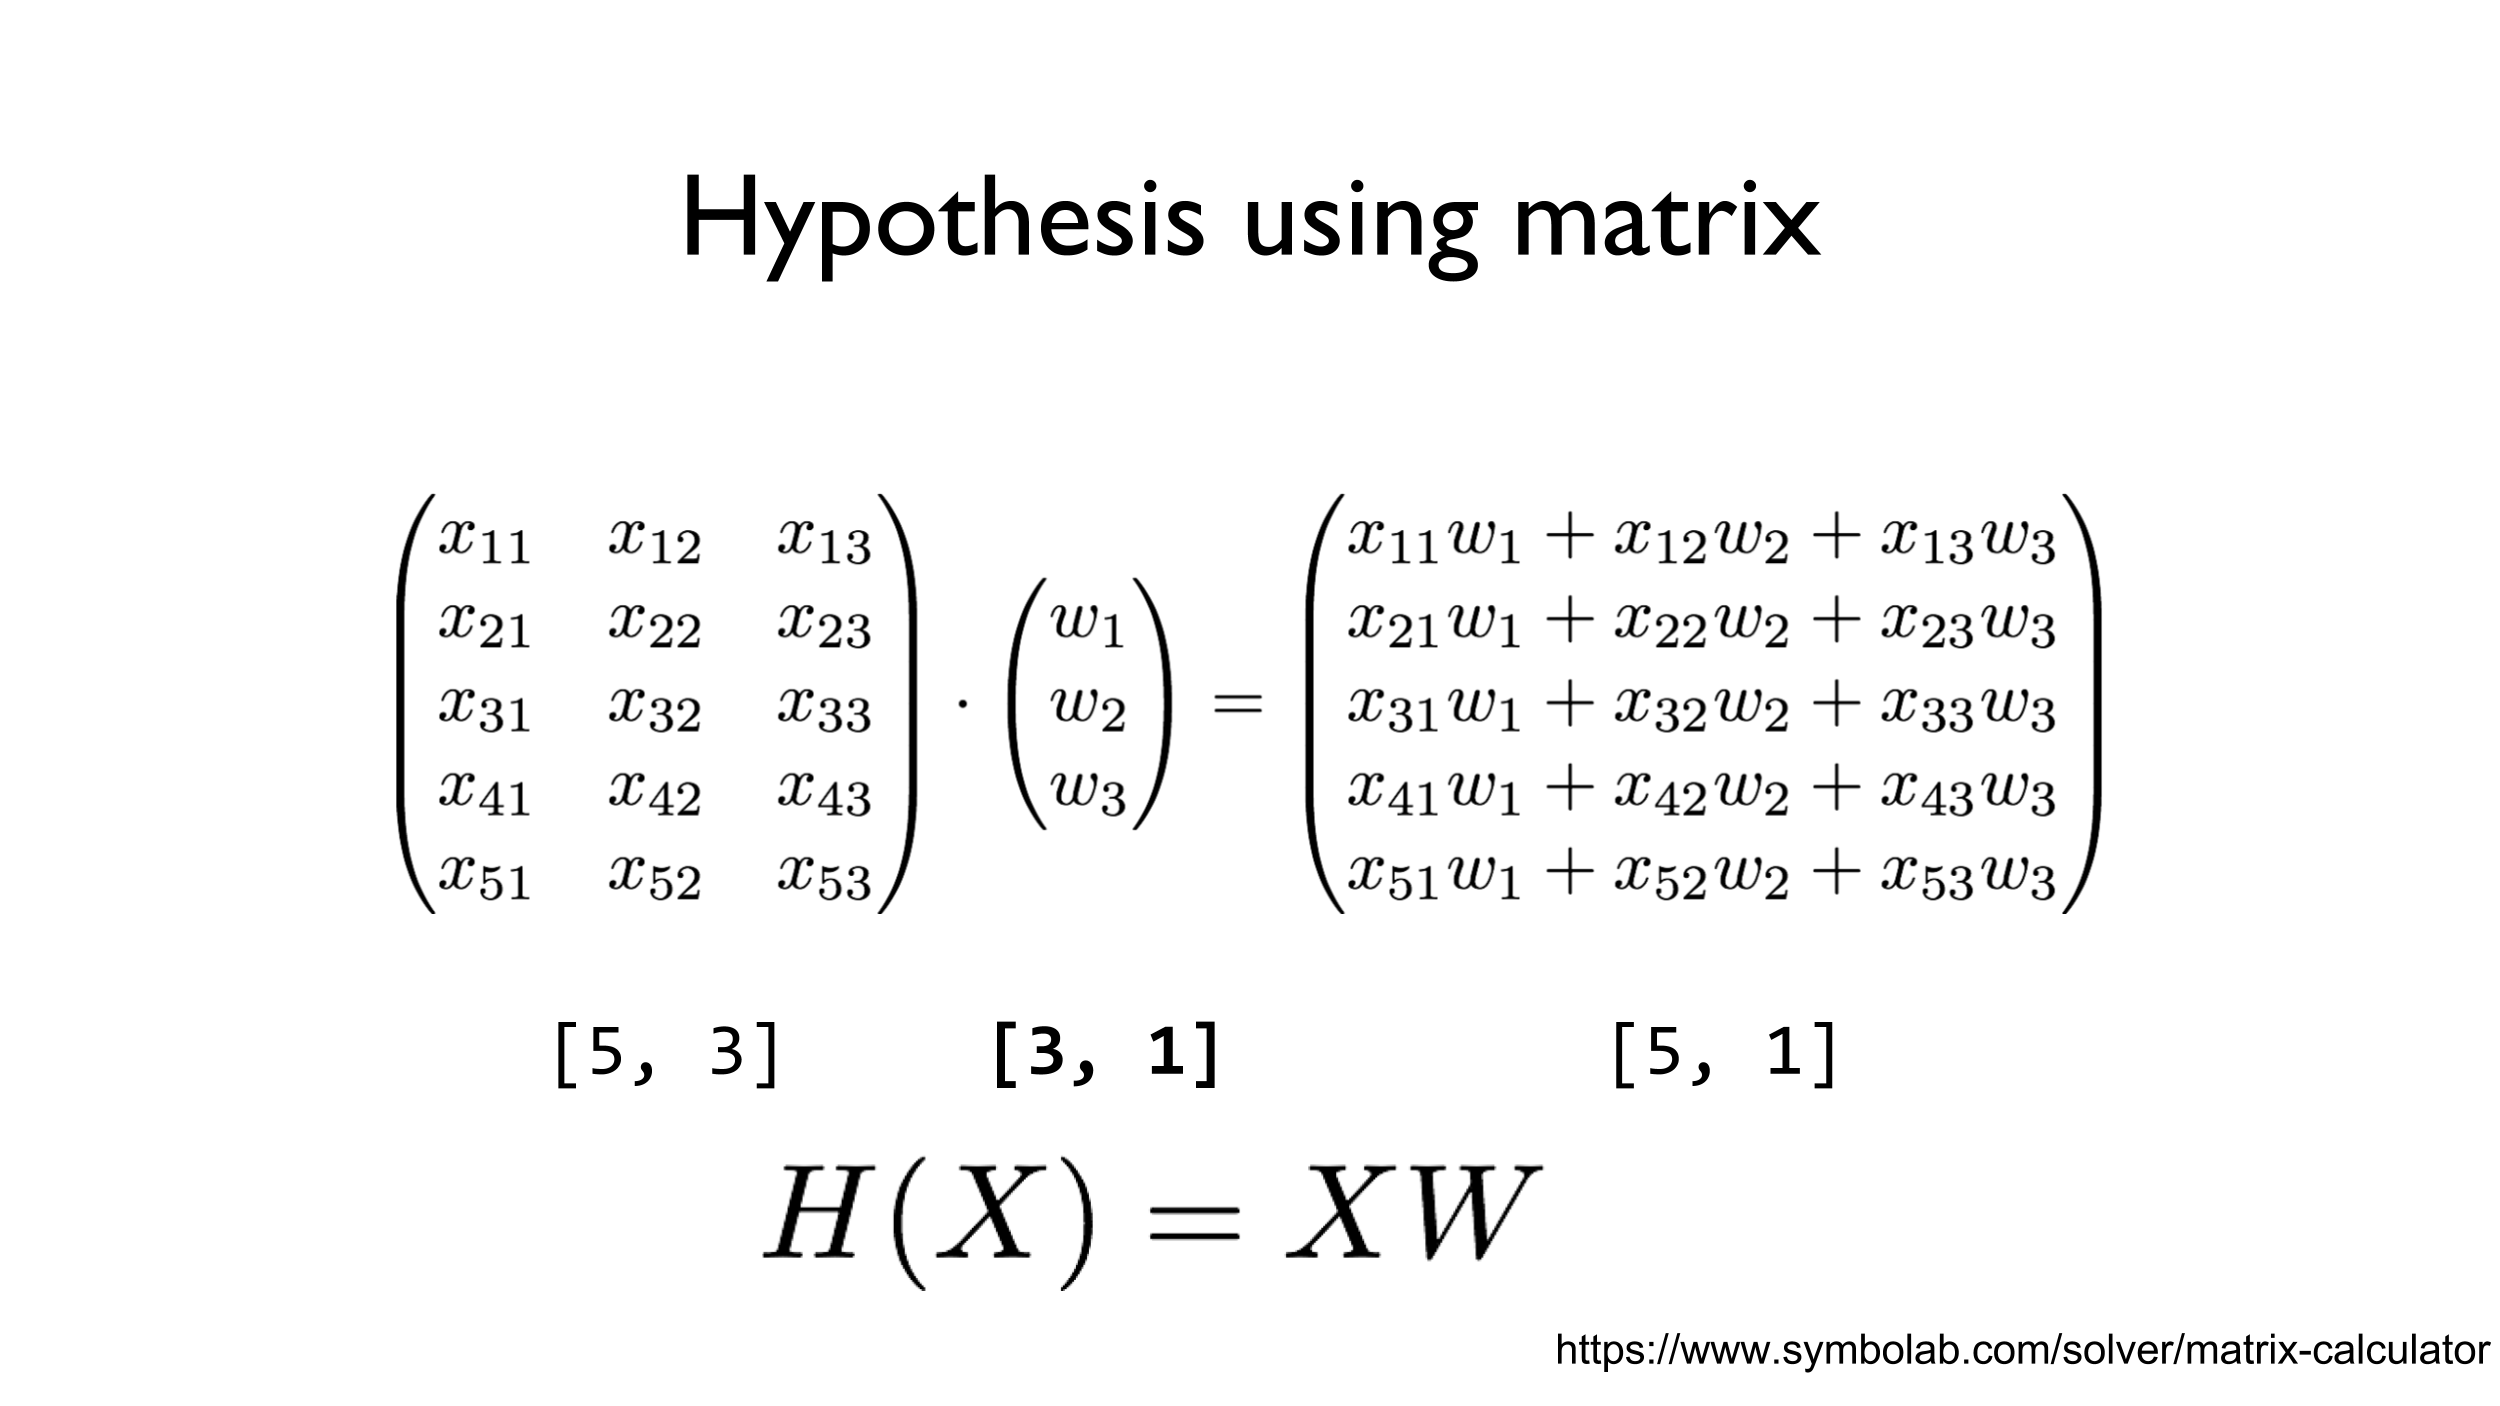

In [25]:
Image('./img/Lec04-032.png', width=900)

In [26]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

In [27]:
# 결과를 도출할 독립변수를 지정
X = tf.placeholder(tf.float32, shape=[None, 3])   # None : 별도 정의를 하지 않음 (가변적으로 활용을 하기 위해서)
Y = tf.placeholder(tf.float32, shape=[None, 1])

In [28]:
# 실험에 사용할 자료를 정의
W = tf.Variable(tf.random_normal([3,1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [29]:
# 가설의 설정
hypothesis = tf.matmul(X,W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [30]:
# Gradient 최적값 구하기 (가설 실행과정을 설계)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [31]:
# Launch the Graph Session
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # 값들을 초기화 

In [32]:
# Input the Data
x_data = [[73., 80., 75.], [93., 88., 93.],
         [89., 91., 90.], [96., 98., 100.], [73., 66., 70.]]
y_data = [[72.], [85.], [90.], [96.], [72.]]

In [33]:
for step in range(2001):
    cost_val, w_val, b_val,  _ = sess.run(
        [cost, W, b, train], feed_dict={X:x_data, Y:y_data})
    if step % 500 == 0:
        print(step, "Cost: ", cost_val ,"bias : ", b_val, "\n", "W :", w_val)

0 Cost:  70988.1 bias :  [-0.05619331] 
 W : [[-0.80331922]
 [ 0.15688035]
 [-0.12052304]]
500 Cost:  15.5483 bias :  [-0.04753976] 
 W : [[-0.1545665 ]
 [ 0.65960056]
 [ 0.46920222]]
1000 Cost:  13.9177 bias :  [-0.04568694] 
 W : [[-0.09226049]
 [ 0.59444803]
 [ 0.47193056]]
1500 Cost:  12.6658 bias :  [-0.04390096] 
 W : [[-0.0369921 ]
 [ 0.53797984]
 [ 0.47304043]]
2000 Cost:  11.7029 bias :  [-0.04217522] 
 W : [[ 0.01212046]
 [ 0.48908982]
 [ 0.47275242]]


In [34]:
for step in range(2001):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X:x_data, Y:y_data})
    if step % 500 == 0:
        print(step, "Cost: ", cost_val, "\n Prediction \n", hy_val)

0 Cost:  11.7013 
 Prediction 
 [[ 75.42623901]
 [ 88.09091187]
 [ 88.09143066]
 [ 96.32743073]
 [ 66.21520996]]
500 Cost:  10.9594 
 Prediction 
 [[ 75.12575531]
 [ 88.29985809]
 [ 88.00313568]
 [ 96.23433685]
 [ 66.51407623]]
1000 Cost:  10.3859 
 Prediction 
 [[ 74.86489105]
 [ 88.48161316]
 [ 87.92691803]
 [ 96.15034485]
 [ 66.77696228]]
1500 Cost:  9.941 
 Prediction 
 [[ 74.63858032]
 [ 88.63963318]
 [ 87.86123657]
 [ 96.07434082]
 [ 67.00839233]]
2000 Cost:  9.59431 
 Prediction 
 [[ 74.44245911]
 [ 88.77693939]
 [ 87.80476379]
 [ 96.00532532]
 [ 67.21234894]]


## 03. Loading data From file

### 01) Import CSV by NUMPY
- http://www.scipy-lectures.org/intro/numpy/numpy.html

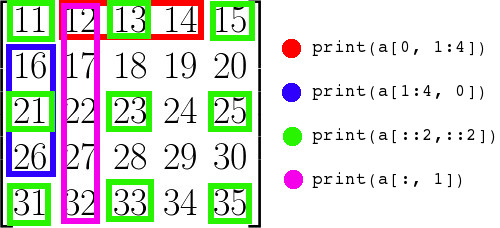

In [35]:
Image("./img/numpy_2D_slicing_diagram.jpg")

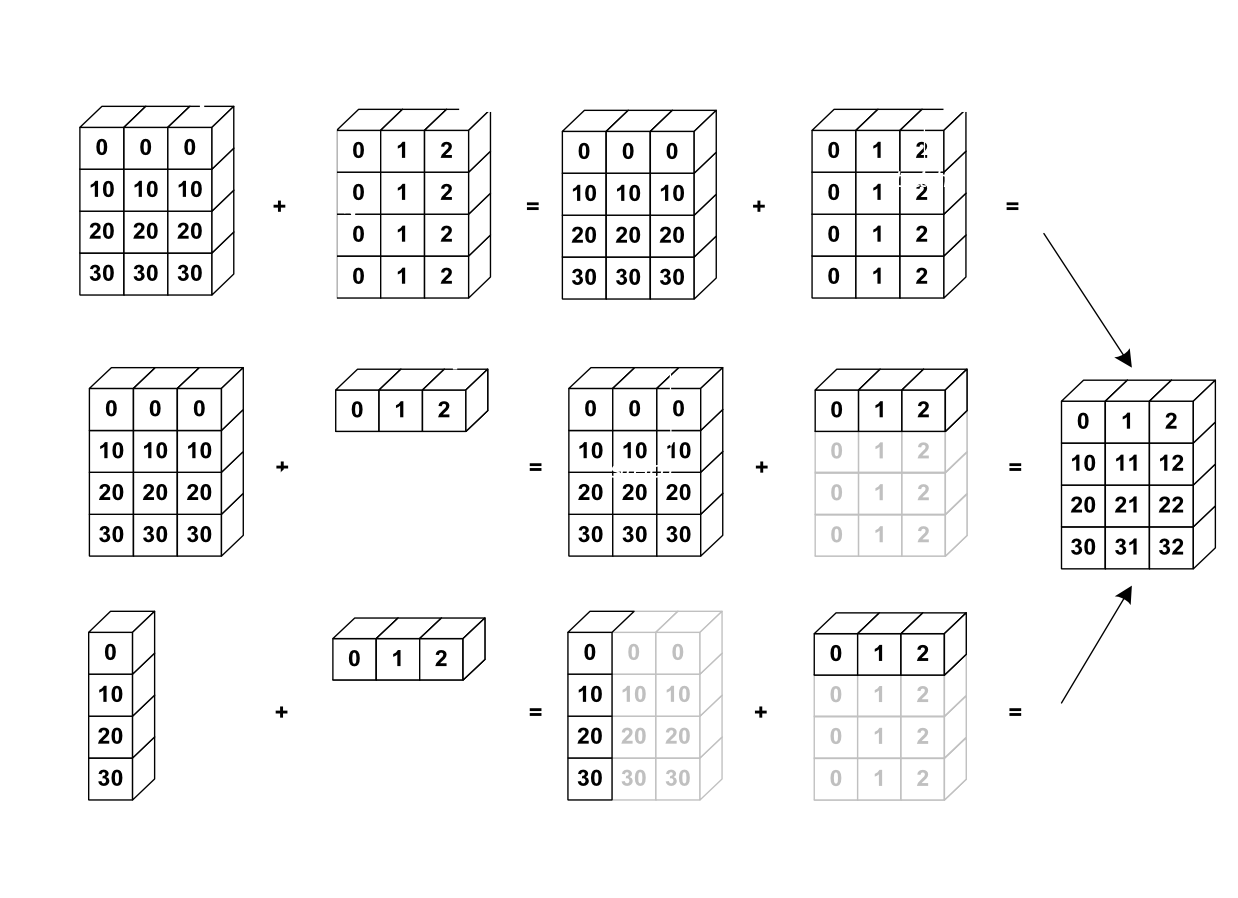

In [36]:
Image('./img/numpy_broadcasting.png', width=900)

In [37]:
import numpy as np

In [38]:
xy = np.loadtxt('./data/data-01-test-score.csv', delimiter=',', dtype=np.float32)
print(xy.shape)
xy[:5]

(25, 4)


array([[  73.,   80.,   75.,   82.],
       [  93.,   88.,   93.,   85.],
       [  89.,   91.,   90.,   80.],
       [  96.,   98.,  100.,   96.],
       [  73.,   66.,   70.,   62.]], dtype=float32)

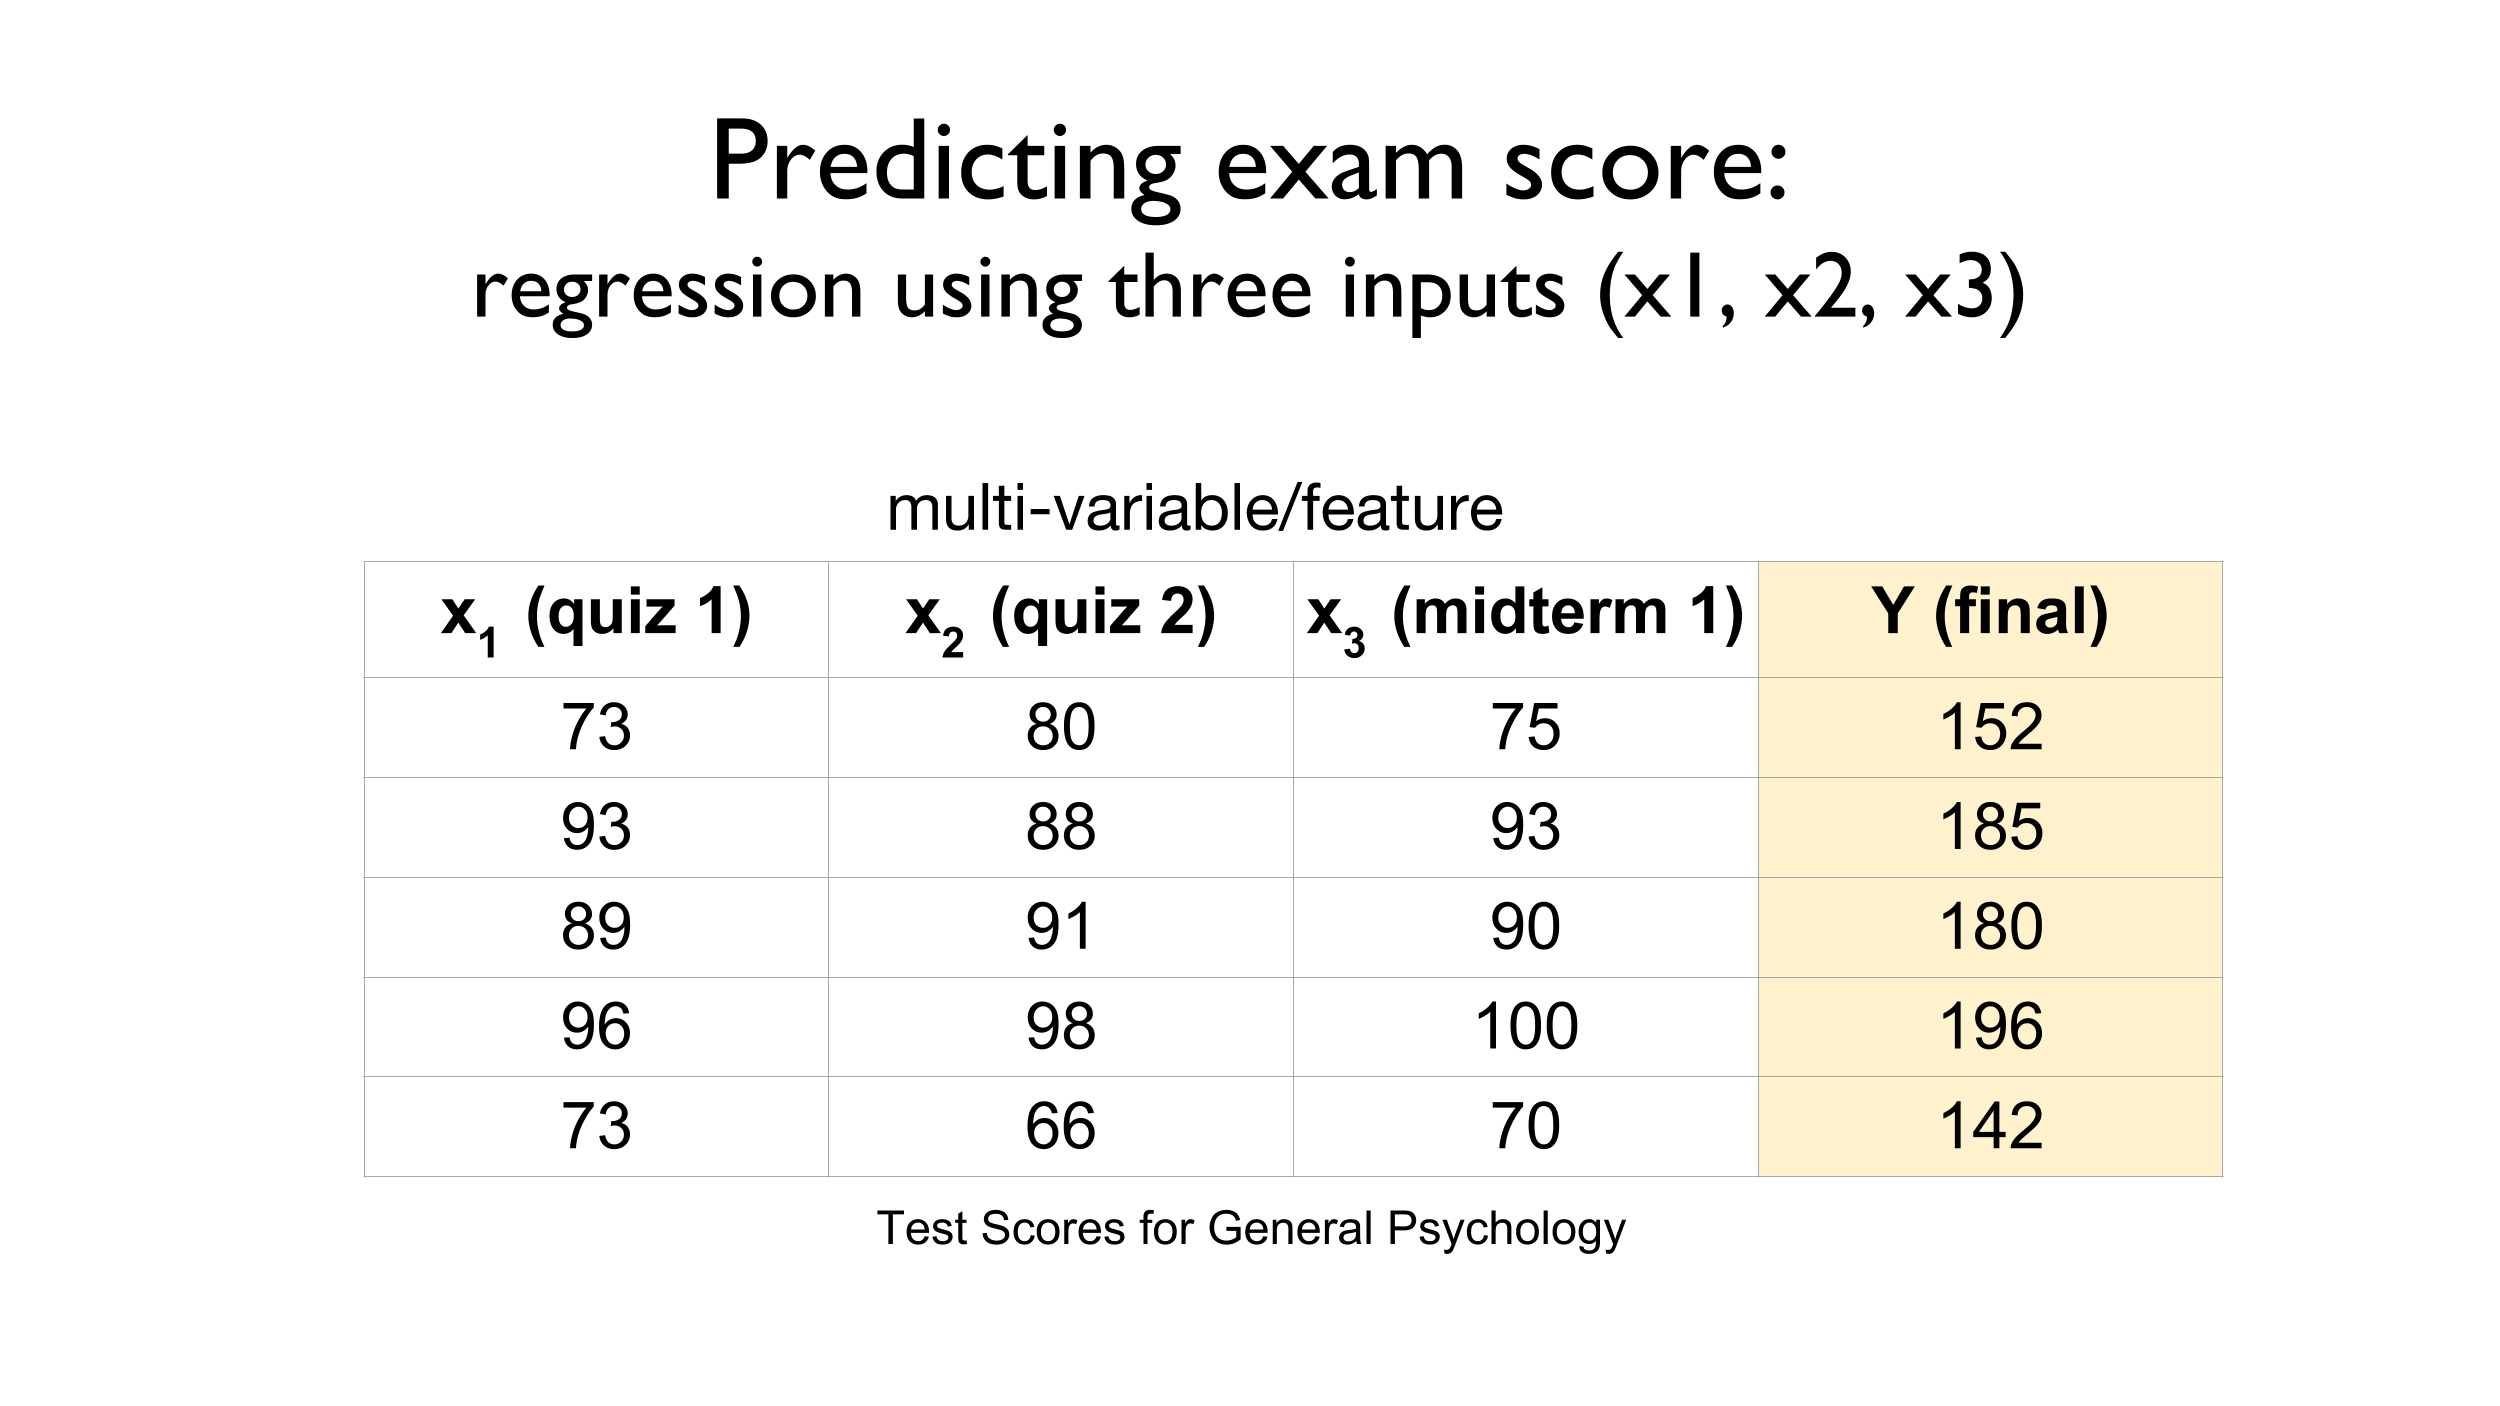

In [39]:
Image('./img/Lec04-02.png', width=900)

In [40]:
x_data = xy[:,0:-1]    # index 는 모두, column 을 마지막을 제외한 나머지
print(x_data.shape)
x_data[:5]

(25, 3)


array([[  73.,   80.,   75.],
       [  93.,   88.,   93.],
       [  89.,   91.,   90.],
       [  96.,   98.,  100.],
       [  73.,   66.,   70.]], dtype=float32)

In [41]:
y_data = xy[:, [-1]]
print(y_data.shape)
y_data[:5]

(25, 1)


array([[ 82.],
       [ 85.],
       [ 80.],
       [ 96.],
       [ 62.]], dtype=float32)

In [42]:
# 2차원으로 하지 않은 경우와 비교
y_data2 = xy[:, -1]
y_data2

array([ 82.,  85.,  80.,  96.,  62.,  41.,  69.,  75.,  75.,  64.,  81.,
        61.,  84.,  52.,  68.,  92.,  77.,  83.,  77.,  79.,  77.,  75.,
        75.,  79.,  92.], dtype=float32)

### 02) CSV in Tensorflow

In [43]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)

In [44]:
# 입력되는 자료형을 정의
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

In [45]:
# 실험할 자료형을 정의
W = tf.Variable(tf.random_normal([3,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [46]:
# 가설의 성립
hypothesis = tf.matmul(X,W) + b

In [47]:
# 비용함수
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [48]:
# Gradient 최적화
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [49]:
# TensorFlow 실행
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val, w_val, b_val, _ = sess.run([cost, W, b, train], 
                                  feed_dict={X:x_data, Y:y_data})
    if step % 500 == 0:
        print("Step: ",step, "   Cost: ", cost_val, "   Bias :", b_val, "\n" ,"W :", w_val, )

Step:  0    Cost:  3214.1    Bias : [ 1.46594071] 
 W : [[ 0.80410469]
 [-0.37077278]
 [ 0.07196243]]
Step:  500    Cost:  94.4479    Bias : [ 1.47033429] 
 W : [[ 0.77392191]
 [-0.06031956]
 [ 0.2102057 ]]
Step:  1000    Cost:  85.7897    Bias : [ 1.47297347] 
 W : [[ 0.62492001]
 [ 0.08450031]
 [ 0.21346378]]
Step:  1500    Cost:  79.2799    Bias : [ 1.47559607] 
 W : [[ 0.49310434]
 [ 0.20708507]
 [ 0.22174768]]
Step:  2000    Cost:  74.3592    Bias : [ 1.47821867] 
 W : [[ 0.37651792]
 [ 0.3110882 ]
 [ 0.23338909]]


In [50]:
# TensorFlow 실행
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [51]:
xy = np.loadtxt('./data/data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:,0:-1]
y_data = xy[:, [-1]]

In [52]:
for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], 
                                  feed_dict={X:x_data, Y:y_data})
    if step % 500 == 0:
        print(step, "Cost: ", cost_val,"\n", "Prediction ", hy_val)

0 Cost:  3214.1 
 Prediction  [[ 15.35308552]
 [ 25.62049103]
 [ 21.43587303]
 [ 23.02159691]
 [ 21.90162849]
 [ 17.10383415]
 [ 15.21654129]
 [  8.10592175]
 [ 25.53378868]
 [ 23.9966507 ]
 [ 17.13817406]
 [ 20.13747597]
 [ 22.43480682]
 [ 19.68471718]
 [ 16.37295341]
 [ 25.10070801]
 [ 21.37138176]
 [ 16.11452866]
 [ 20.33852386]
 [ 17.50843239]
 [ 18.73185158]
 [ 23.4559288 ]
 [ 17.35094261]
 [ 16.19579697]
 [ 25.4236393 ]]
500 Cost:  94.4479 
 Prediction  [[ 68.90442657]
 [ 87.68782043]
 [ 83.7783432 ]
 [ 90.87563324]
 [ 68.70227814]
 [ 51.27710342]
 [ 66.59168243]
 [ 47.0763588 ]
 [ 82.95748138]
 [ 76.88887024]
 [ 65.99340057]
 [ 67.28101349]
 [ 86.84296417]
 [ 73.12944031]
 [ 67.63676453]
 [ 88.25780487]
 [ 71.60734558]
 [ 78.27568817]
 [ 82.1026535 ]
 [ 73.01412201]
 [ 78.66184235]
 [ 81.79113007]
 [ 74.69577026]
 [ 70.20441437]
 [ 90.12776947]]
1000 Cost:  85.7897 
 Prediction  [[ 69.86018372]
 [ 86.88019562]
 [ 83.99173737]
 [ 91.09229279]
 [ 67.61364746]
 [ 50.22319031]
 [ 67

#### 01> TensorFlow로 생성된 함수의 활용 : index 1개

In [53]:
sess.run(hypothesis, feed_dict={X:[[100, 70, 101]]})

array([[ 84.47847748]], dtype=float32)

In [54]:
sess.run([hypothesis, W], feed_dict={X:[[100, 70, 101]]})

[array([[ 84.47847748]], dtype=float32), array([[ 0.37651792],
        [ 0.3110882 ],
        [ 0.23338909]], dtype=float32)]

In [55]:
sess.run([hypothesis, b, W], feed_dict={X:[[100, 70, 101]]})

[array([[ 84.47847748]], dtype=float32),
 array([ 1.47821867], dtype=float32),
 array([[ 0.37651792],
        [ 0.3110882 ],
        [ 0.23338909]], dtype=float32)]

#### 02> TensorFlow로 생성된 함수의 활용 : index 2개  

In [56]:
sess.run(hypothesis, feed_dict={X:[[60,70,110], [90,100,80]]})

array([[ 71.51826477],
       [ 85.14477539]], dtype=float32)

In [57]:
sess.run([hypothesis, W], feed_dict={X:[[60,70,110], [90,100,80]]})

[array([[ 71.51826477],
        [ 85.14477539]], dtype=float32), array([[ 0.37651792],
        [ 0.3110882 ],
        [ 0.23338909]], dtype=float32)]

In [58]:
sess.run([hypothesis,b,W], feed_dict={X:[[60,70,110], [90,100,80]]})

[array([[ 71.51826477],
        [ 85.14477539]], dtype=float32),
 array([ 1.47821867], dtype=float32),
 array([[ 0.37651792],
        [ 0.3110882 ],
        [ 0.23338909]], dtype=float32)]

## 03. Queue Runners File Queue.
- (19Page) https://docs.google.com/presentation/d/1WF5yphSXyzYLG8wmVvOpRmgAlw4vewbK51ZwLAOFZXk/edit#slide=id.g1d2206496a_0_232

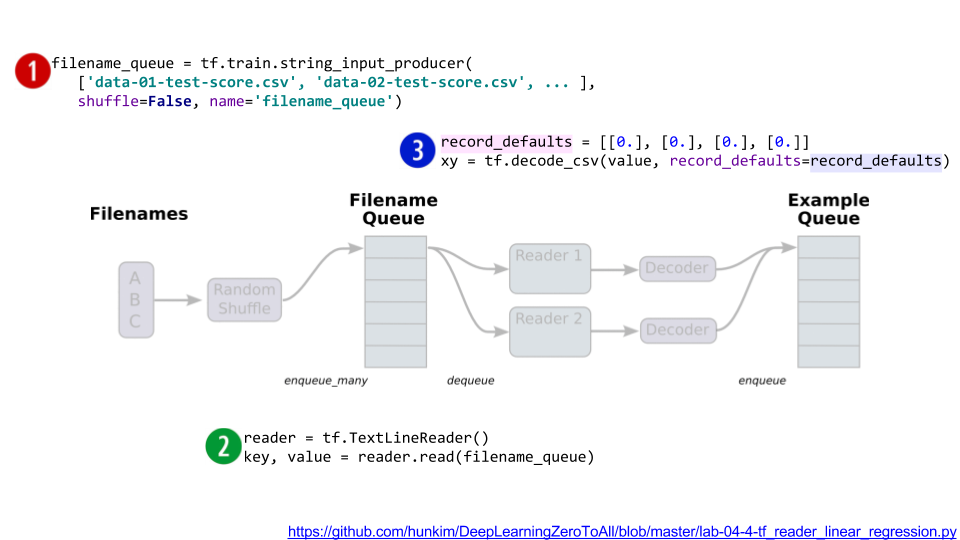

In [59]:
Image('./img/Lab04-053.png',width=900)

### 01) Basic Model

In [60]:
import tensorflow as tf

In [61]:
# placeholder의 자료입력형식을 정의
X = tf.placeholder(tf.float32, shape=[None,3])
Y = tf.placeholder(tf.float32, shape=[None,1])

In [62]:
# 실험의 재료를 정의
tf.set_random_seed(777)  # for reproducibility
W = tf.Variable(tf.random_normal([3,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [63]:
# 가설 / 비용함수
hypothesis = tf.matmul(X,W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [64]:
# Gradient 최적값의 계산
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [65]:
# TensorFlow 활성화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#### -----------------------------------------------------------------------------------

In [66]:
# 불러올 CSV 파일목록을 정의
filename_queue = tf.train.string_input_producer(
    ['./data/data-01-test-score.csv'], shuffle=False, name='filename_queue')

In [67]:
# Reader 의 형식을 정의 (TextLineReader() 를 사용)
reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

In [68]:
# Decoder를 통해서 인식할 CSV의 자료형태, 구분기호를 정의
# record_defaults = [[0.], [0.], [0.], [0.], [0.]]   # 데이터 columns의 갯수와 다르면 최종적으로 오류가 발생
record_defaults = [[0.], [0.], [0.], [0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults)

In [69]:
# Collect Batches 형태를 정의
train_x_batch, train_y_batch = tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

In [70]:
# Queue Runners 와 연결
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

#### -----------------------------------------------------------------------------------

In [71]:
for step in range(2001):
    x_batch, y_batch = sess.run([train_x_batch,train_y_batch])
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict = {X: x_batch, Y: y_batch})
    if step % 500 == 0:
        print(step, "Cost: ", cost_val, '\n Prediction \n', hy_val)

0 Cost:  14386.6 
 Prediction 
 [[-44.46974564]
 [-53.59727097]
 [-52.60181046]
 [-57.06221771]
 [-41.43210983]
 [-30.87483215]
 [-42.8450737 ]
 [-31.7892189 ]
 [-50.1934967 ]
 [-46.4556694 ]]
500 Cost:  81.0567 
 Prediction 
 [[ 71.93395996]
 [ 85.12146759]
 [ 84.69320679]
 [ 92.44522095]
 [ 64.08320618]
 [ 46.75342941]
 [ 69.37545013]
 [ 51.87099075]
 [ 79.15326691]
 [ 73.20769501]]
1000 Cost:  74.4897 
 Prediction 
 [[ 72.40747833]
 [ 84.66225433]
 [ 84.77098083]
 [ 92.52237701]
 [ 63.48426056]
 [ 46.18152618]
 [ 69.71180725]
 [ 52.53992462]
 [ 78.47714233]
 [ 72.47389221]]
1500 Cost:  69.2369 
 Prediction 
 [[ 72.80725098]
 [ 84.26676941]
 [ 84.8321991 ]
 [ 92.59169006]
 [ 62.96335983]
 [ 45.70067978]
 [ 70.01467896]
 [ 53.14091873]
 [ 77.90835571]
 [ 71.87565613]]
2000 Cost:  64.995 
 Prediction 
 [[ 73.14565277]
 [ 83.92549896]
 [ 84.88030243]
 [ 92.65383148]
 [ 62.50978088]
 [ 45.29532623]
 [ 70.28678131]
 [ 53.67980194]
 [ 77.4285965 ]
 [ 71.38697052]]


In [72]:
# Queue 작동을 멈춘다 ( 의무적으로 입력해야 하는 내용)
coord.request_stop()
coord.join(threads)

### 02) 특정한 값을 모델에 적용해보기

In [73]:
# Ask my score
print("Your score will be ",
      sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))

print("Other scores will be ",
      sess.run(hypothesis, feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))

Your score will be  [[ 75.61369324]]
Other scores will be  [[ 80.64395905]
 [ 87.17842102]]


### 03) Shuffle batch (섞을 떄, batch 값을 임의로 조절하기)

#### https://www.tensorflow.org/programmers_guide/reading_data

In [74]:
def input_pipeline(filenames, batch_size, num_epochs=None):
    filename_queue = tf.train.string_input_producer(filenames, num_epochs=num_epochs, shuffle=True)
    example, label = read_my_file_format(filename_queue)
    # min_after_dequeue defines how big a buffer we will randomly sample
    #   from -- bigger means better shuffling but slower start up and more
    #   memory used.
    # capacity must be larger than min_after_dequeue and the amount larger
    #   determines the maximum we will prefetch.  Recommendation:
    #   min_after_dequeue + (num_threads + a small safety margin) * batch_size
    min_after_dequeue = 10000
    capacity = min_after_dequeue + 3 * batch_size
    example_batch, label_batch = tf.train.shuffle_batch(
        [example, label], batch_size=batch_size, capacity=capacity,
        min_after_dequeue=min_after_dequeue)
    return example_batch, label_batch